## Introduction to data visualization in r with ggplot2

Explain the importance of data visualization and introduce the `ggplot2` package.


# Introduction to Data Visualization in R with ggplot2

## The Importance of Data Visualization

Data visualization is a crucial step in the data analysis workflow. It allows us to:

- **Understand data:** Visual representations can reveal patterns, trends, outliers, and relationships that might be hidden in raw data or summary statistics.
- **Communicate insights:** Visuals make complex data and findings accessible and understandable to a wider audience.
- **Explore data:** Interactive visualizations facilitate exploratory data analysis, allowing us to ask questions and discover new aspects of the data.
- **Validate findings:** Visualizations can help confirm or challenge hypotheses and model results.

In essence, data visualization transforms data into visual objects that our brains are adept at processing, leading to faster and deeper understanding.

## Introducing ggplot2

[ggplot2](https://r-graph-gallery.com/) is a powerful and elegant data visualization package in R, based on the principles of the "Grammar of Graphics" developed by Leland Wilkinson. It provides a structured and flexible way to create a wide variety of plots.

### The Grammar of Graphics

The grammar of graphics breaks down plots into a set of components that can be combined in a systematic way:

| Component           | Description                                                                                  |
|---------------------|----------------------------------------------------------------------------------------------|
| **Data**            | The dataset containing the variables to be visualized.                                       |
| **Aesthetics**      | Mapping variables from the data to visual properties of the plot (x, y, color, size, etc.). |
| **Geoms**           | The visual elements used to represent the data (e.g., points, lines, bars, boxes).           |
| **Facets**          | Creating multiple plots based on categorical variables for subgroup comparisons.             |
| **Stats**           | Statistical summaries like means, counts, smoothing curves.                                  |
| **Scales**          | Controls mapping from data values to aesthetic values (linear, log, color gradients, etc.).  |
| **Coordinate System** | The space in which the plot is drawn (Cartesian, polar, etc.).                             |

### Key Components of a ggplot2 Plot

A `ggplot2` plot is built layer by layer using the `+` operator. The basic structure typically involves:

1. **`ggplot()`**: The base function, specifying the data to be used.
2. **`aes()`**: Defining the aesthetic mappings (e.g., `aes(x = variable1, y = variable2)`).
3. **`geom_*()`**: Adding a geometric object layer (e.g., `geom_point()`, `geom_bar()`, `geom_line()`).

Additional layers can be added for themes, labels, annotations, and more.

```
1. SINGLE column --> plot
2. correlation between 2 clolumns (A col & B col) --> correlation score --> plot
3. mutiple columns (> 2), correlation matrix --> plot
```

### Loading the ggplot2 Library

Before using `ggplot2`, you need to load the library:

In [ ]:
library(ggplot2)

In [ ]:
df <- read.csv('/content/sample_data/all_gdp_refugees.csv')

In [ ]:
head(df)

country     iso2c iso3c year lastupdated edu_exp_gdp gdp_per_capita
1 Afghanistan AF    AFG   2015 2025-07-01  3.25580     565.5697      
2 Afghanistan AF    AFG   2017 2025-07-01  4.34319     525.4698      
3 Afghanistan AF    AFG   2016 2025-07-01  4.54397     522.0822      
4 Afghanistan AF    AFG   2014 2025-07-01  3.69522     625.0549      
5 Afghanistan AF    AFG   2009 2025-07-01  4.81064     452.0537      
6 Afghanistan AF    AFG   2013 2025-07-01  3.45446     637.0871      
  gov_exp_gdp unemployment_rate inflation_rate ⋯ Country.of.Origin
1 NA           9.052            -0.6617092     ⋯ Afghanistan      
2 NA          11.184             4.9759515     ⋯ Afghanistan      
3 NA          10.133             4.3838920     ⋯ Afghanistan      
4 NA           7.915             4.6739960     ⋯ Afghanistan      
5 NA           7.754            -6.8111611     ⋯ Afghanistan      
6 NA           7.930             7.3857718     ⋯ Afghanistan      
  Country.of.Asylum.ISO Refugees Returned.Refugees Asylum.Seekers IDPs   
1 -                     2666294   61381            258862         1174306
2 -                     2624265   60541            333986         1837079
3 -                     2501447  383950            369072         1797551
4 -                     2596259   17815             85407          805409
5 -                     2887114   57577             30406          297129
6 -                     2556483   39665             75284          631286
  Returned.IDPs Stateless HST OOC   
1 123653        0         0   150369
2  32649        0         0   448040
3      0        0         0   114221
4      0        0         0   201361
5   7225        0         0     1479
6  21830        0         0   275817

In [ ]:
colnames(df)

[1] "country"               "iso2c"                 "iso3c"                
 [4] "year"                  "lastupdated"           "edu_exp_gdp"          
 [7] "gdp_per_capita"        "gov_exp_gdp"           "unemployment_rate"    
[10] "inflation_rate"        "population"            "urban_pop_percent"    
[13] "education_index"       "hdi_proxy"             "region"               
[16] "capital"               "longitude"             "latitude"             
[19] "income"                "lending"               "Country.of.Asylum"    
[22] "Country.of.Origin"     "Country.of.Asylum.ISO" "Refugees"             
[25] "Returned.Refugees"     "Asylum.Seekers"        "IDPs"                 
[28] "Returned.IDPs"         "Stateless"             "HST"                  
[31] "OOC"

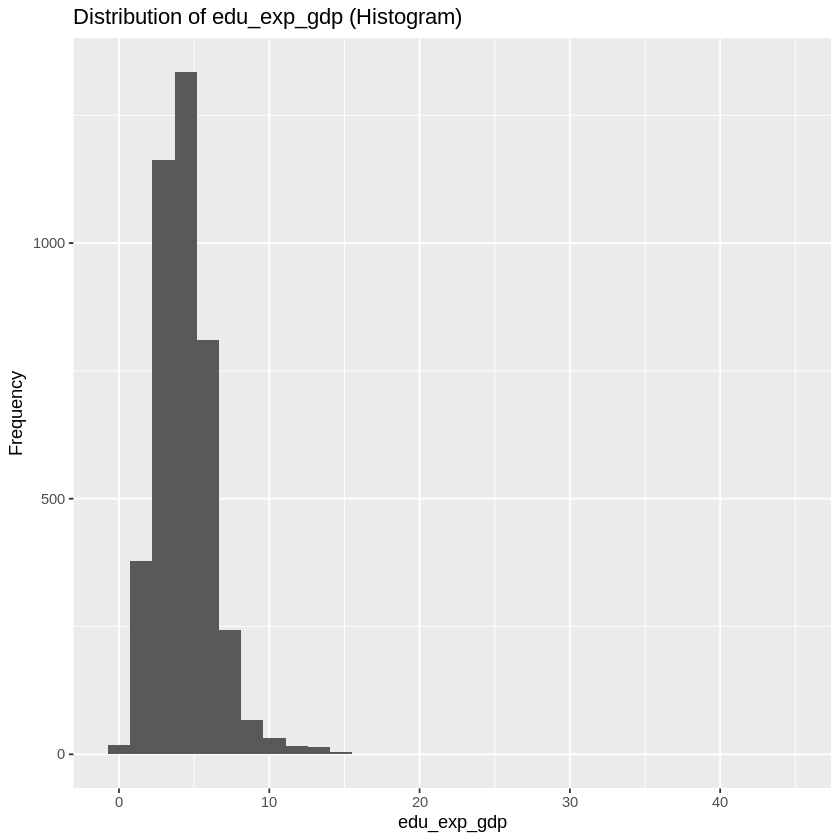

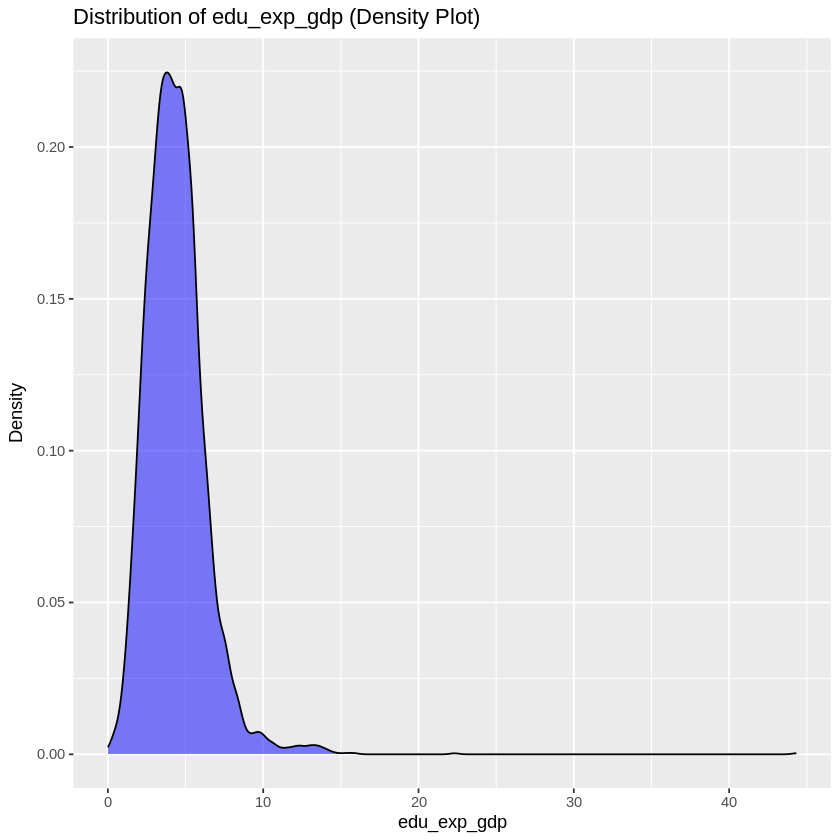

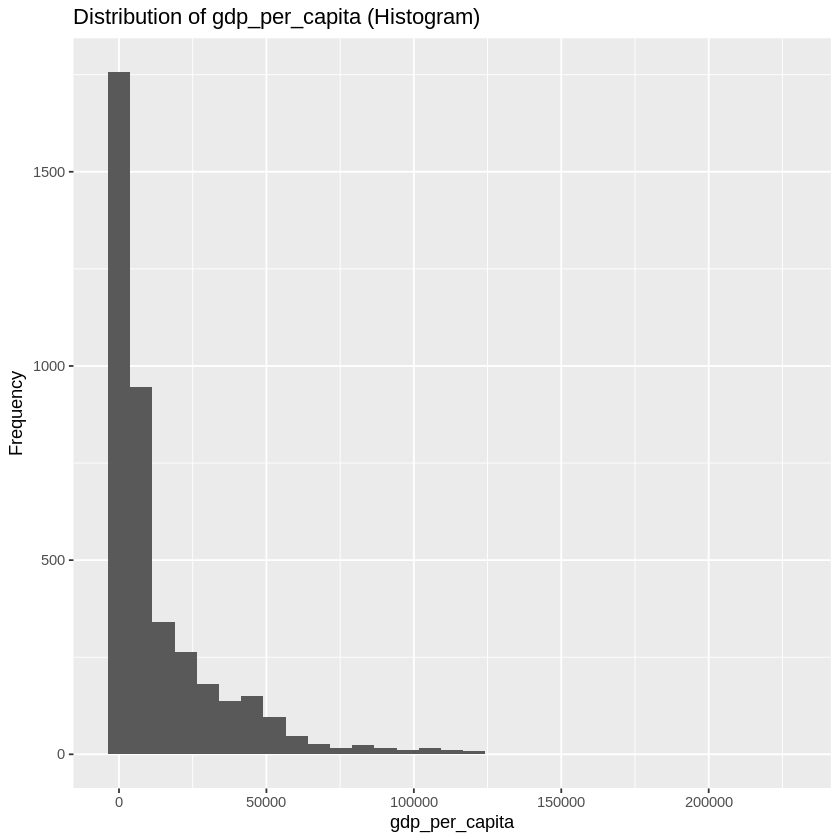

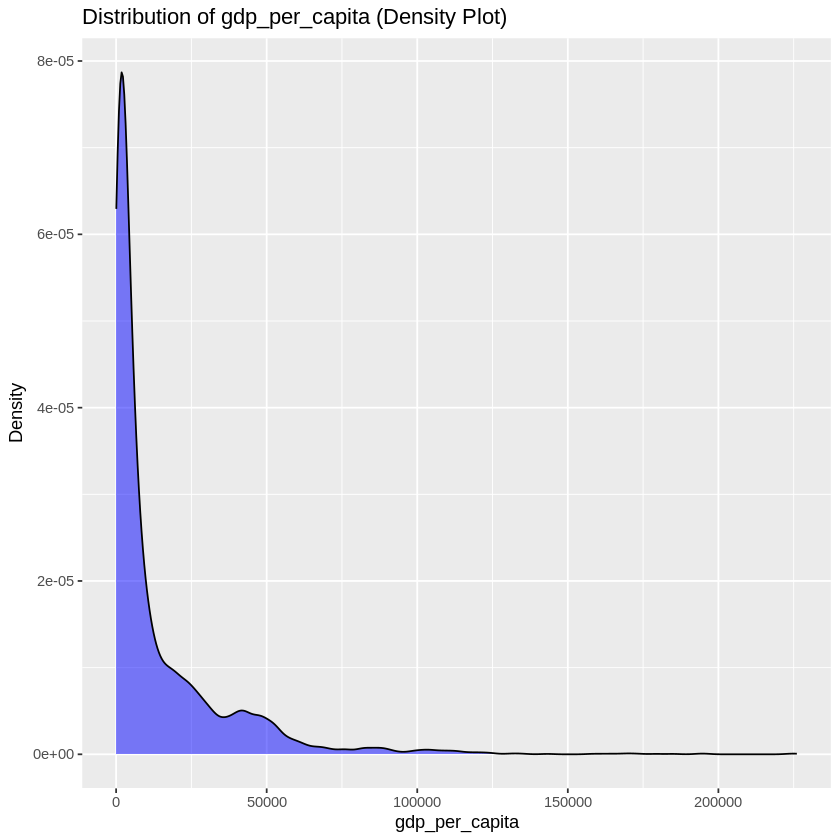

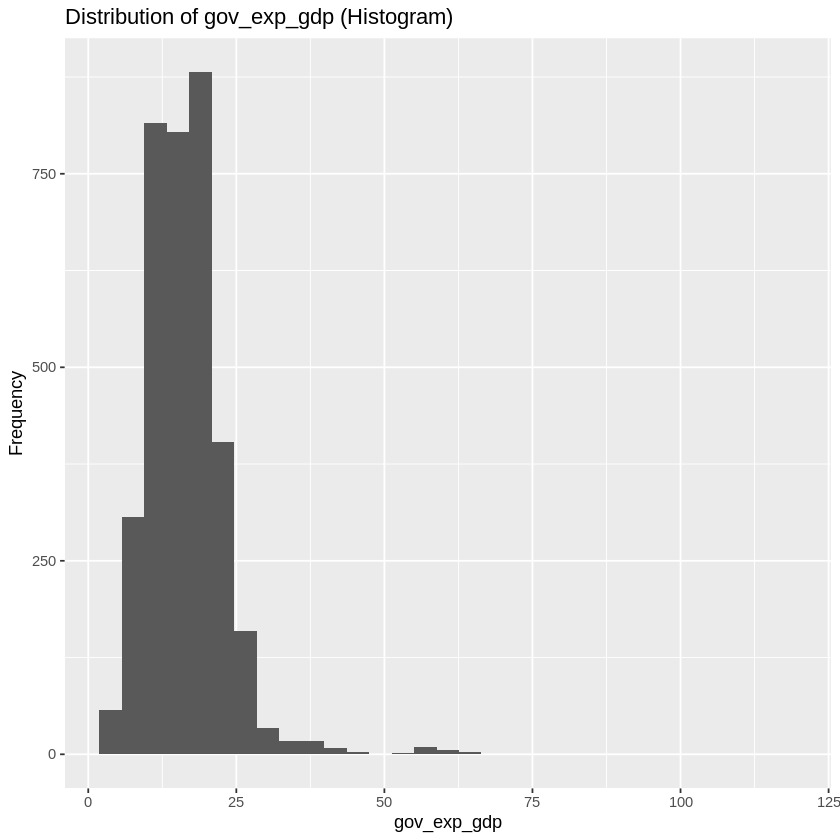

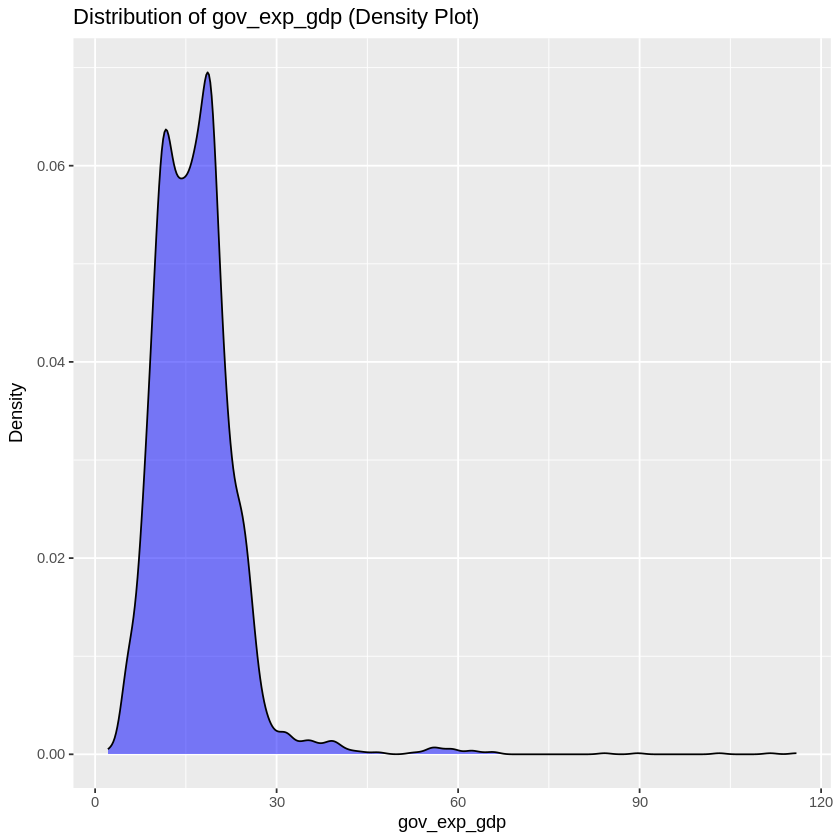

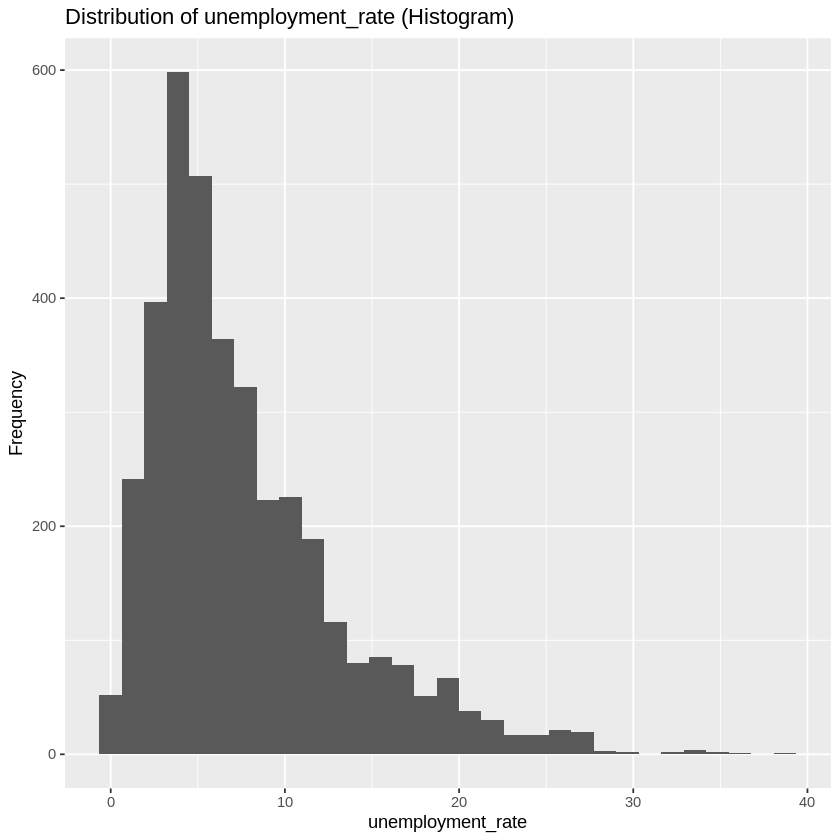

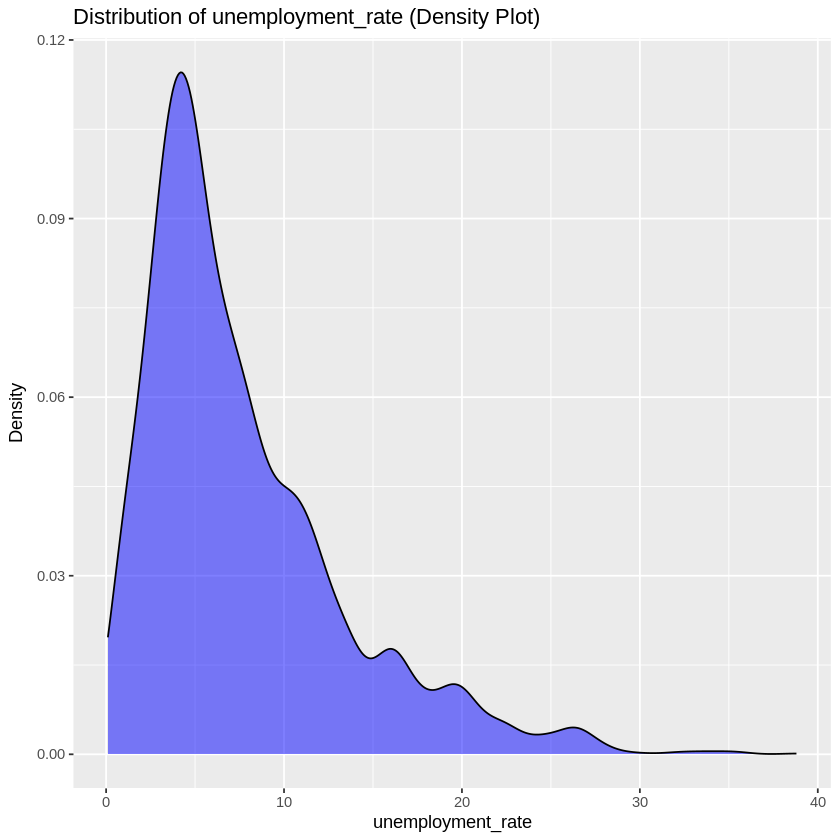

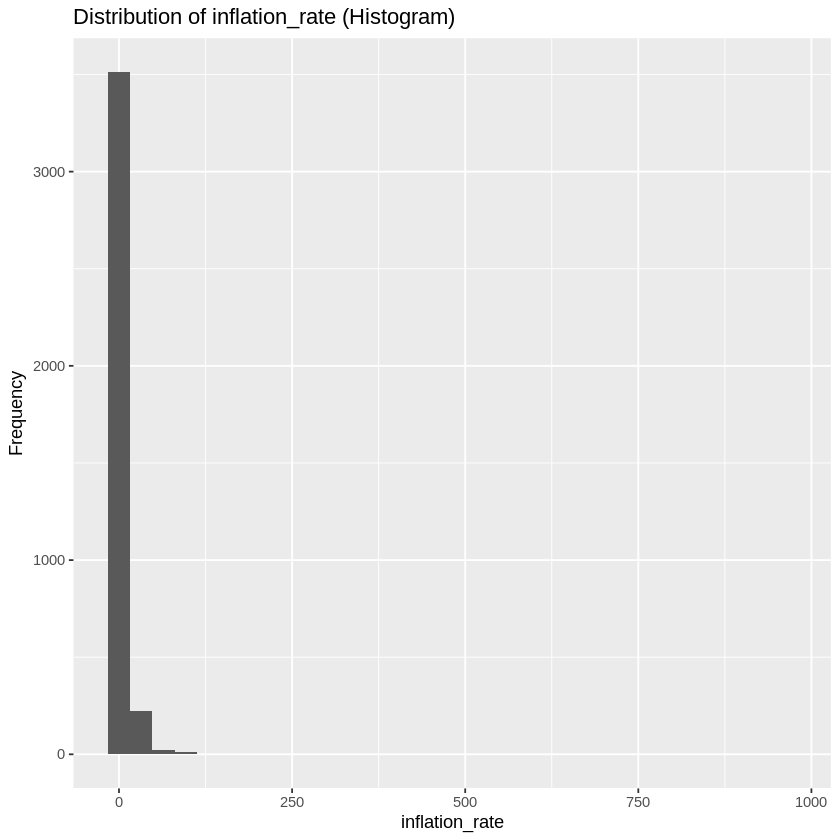

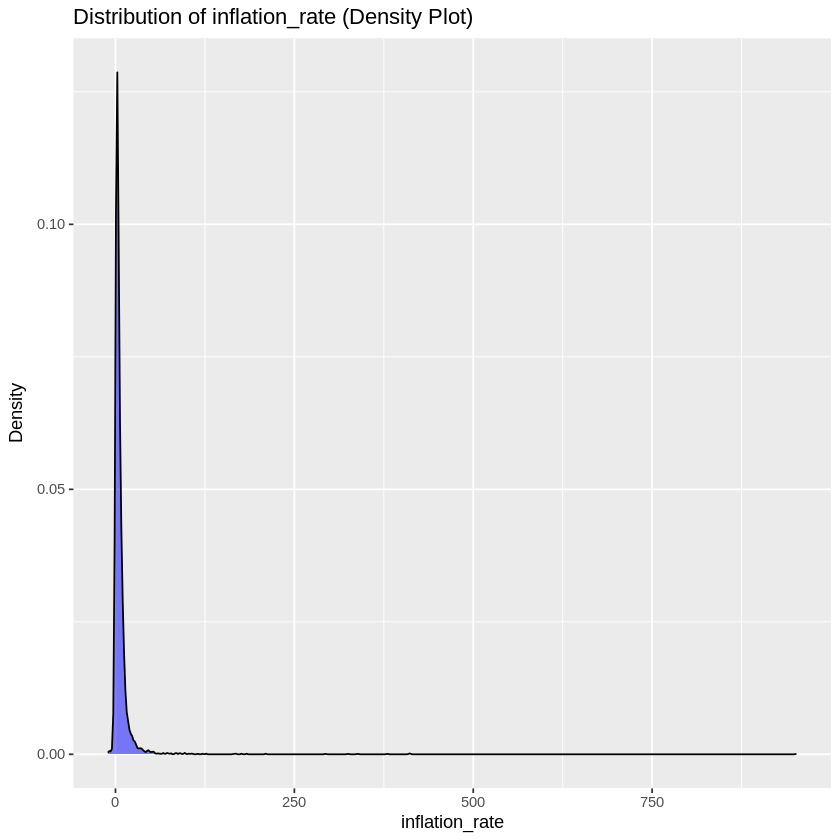

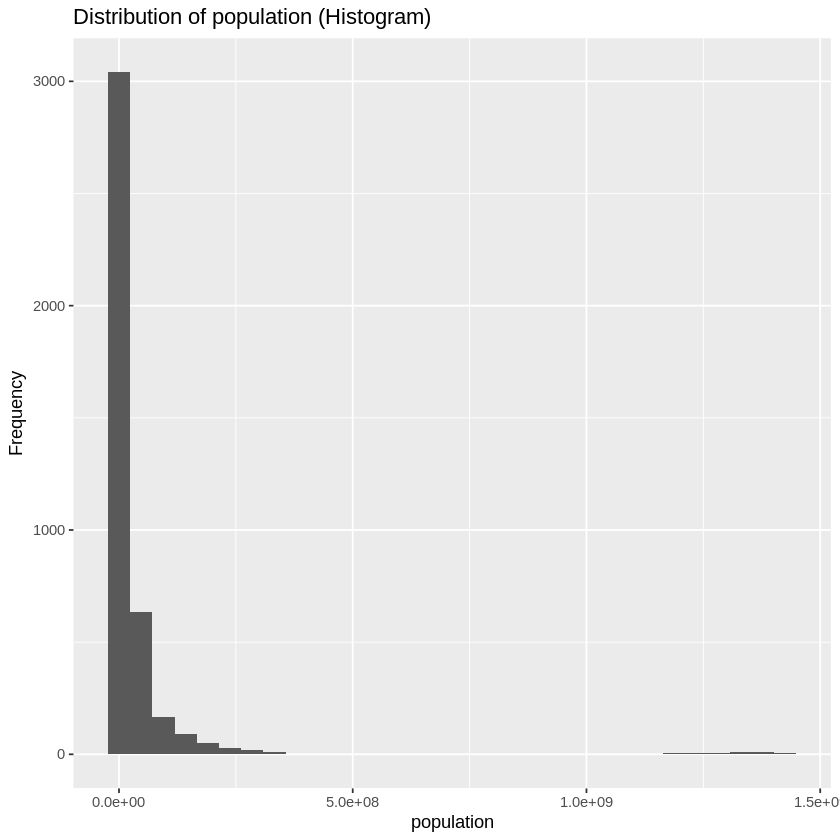

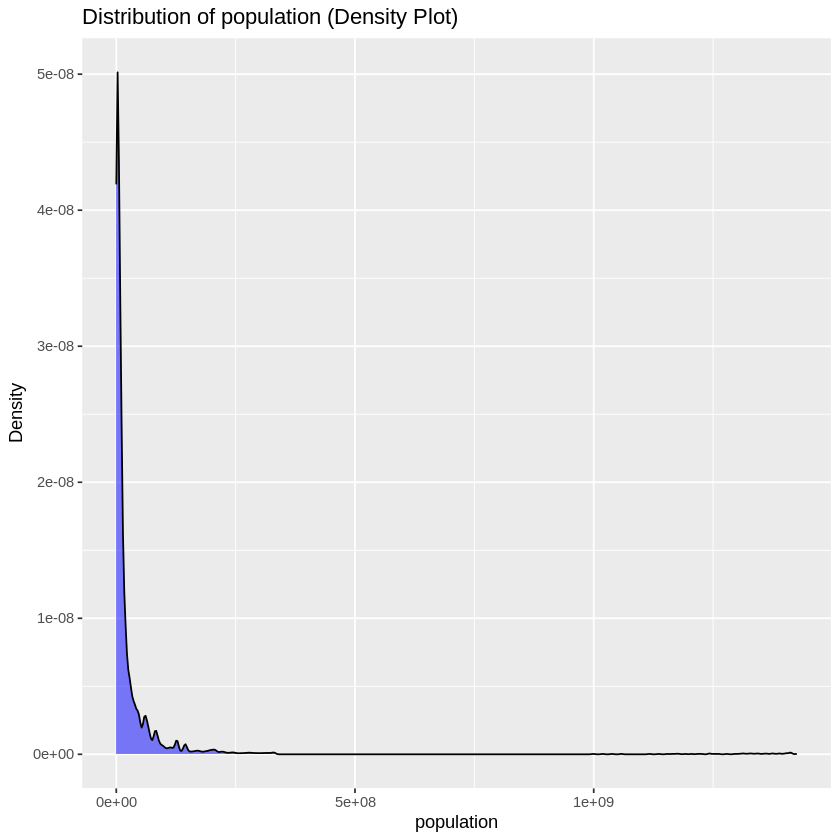

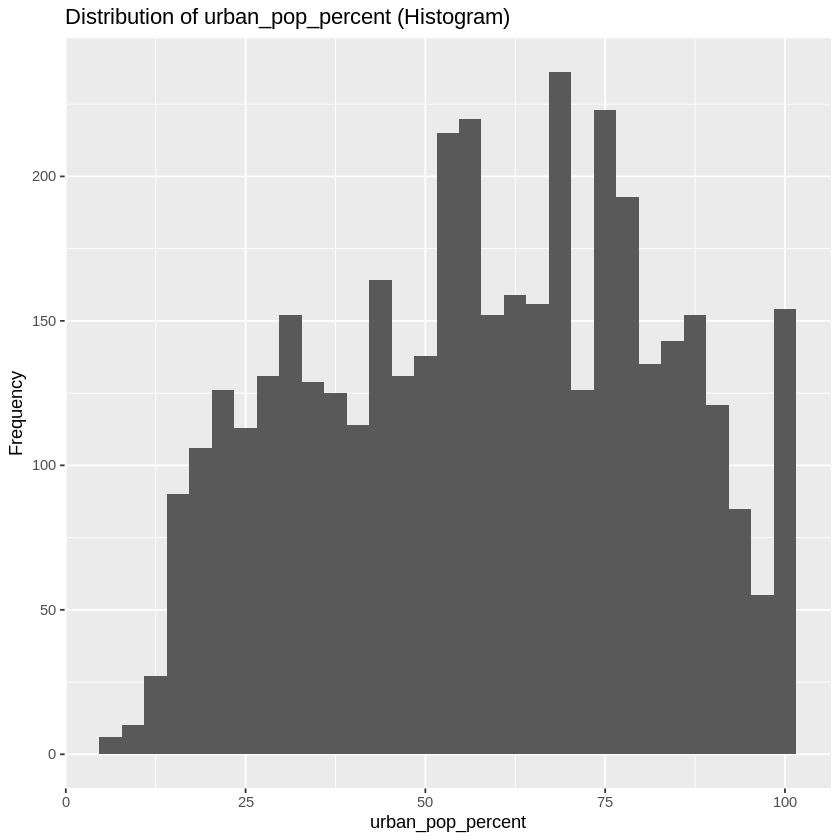

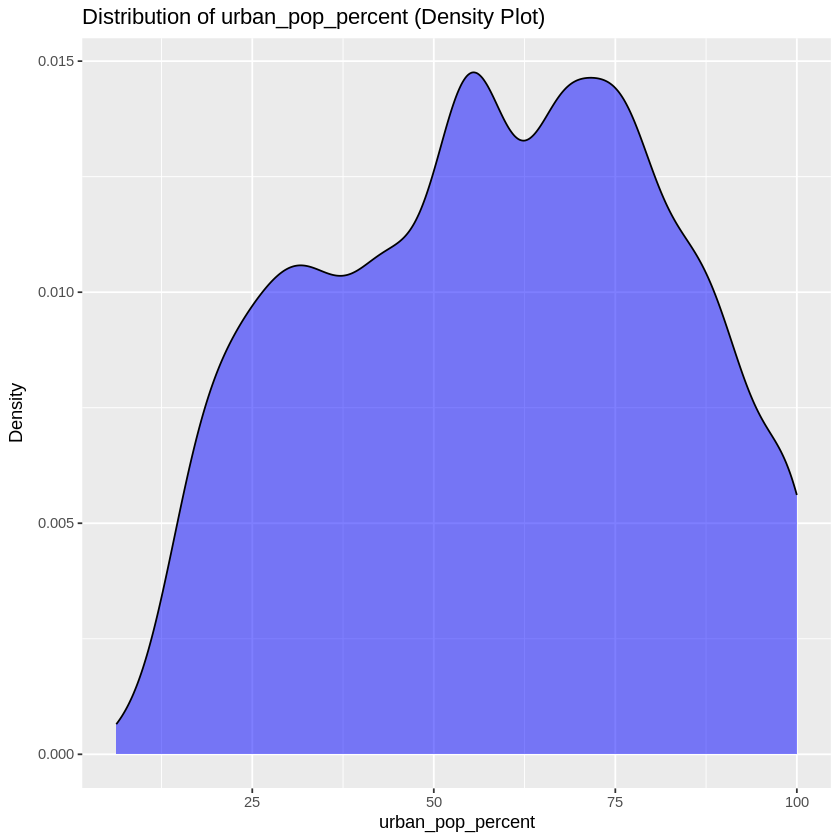

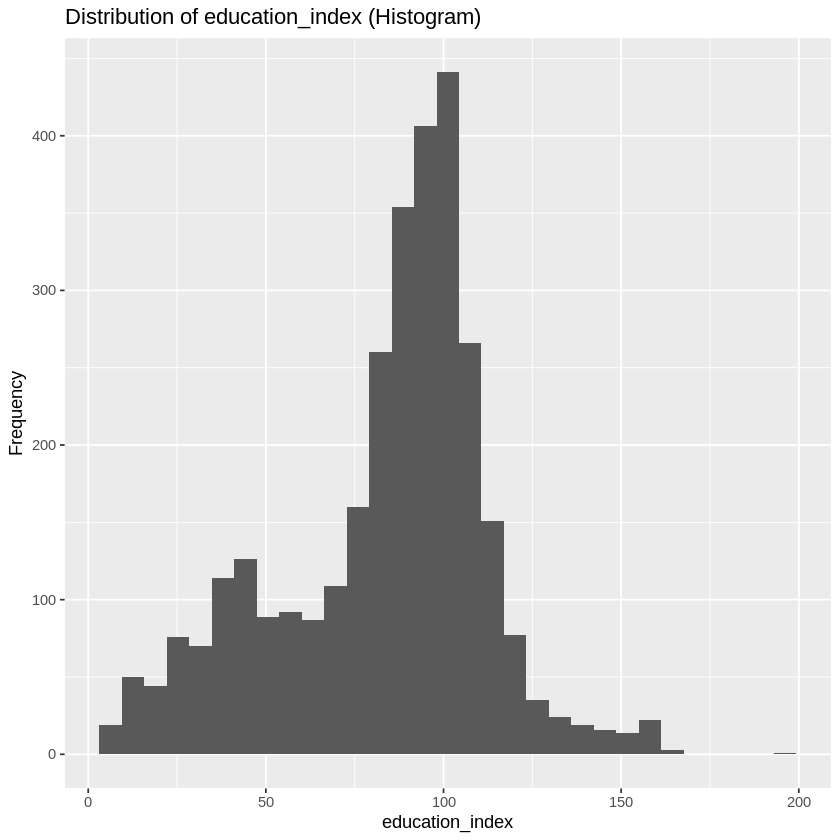

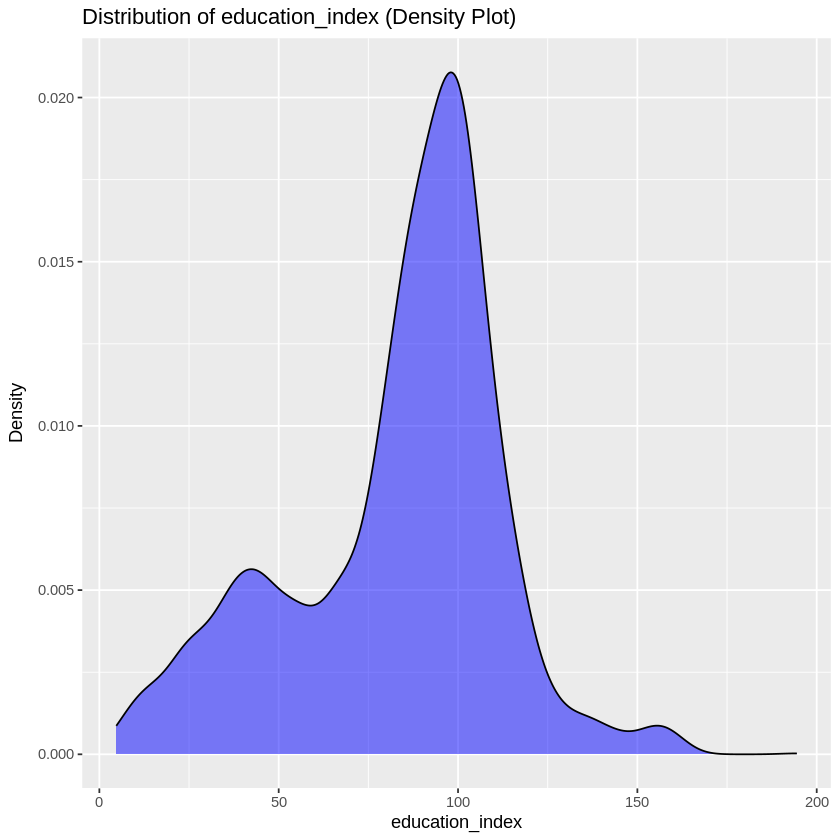

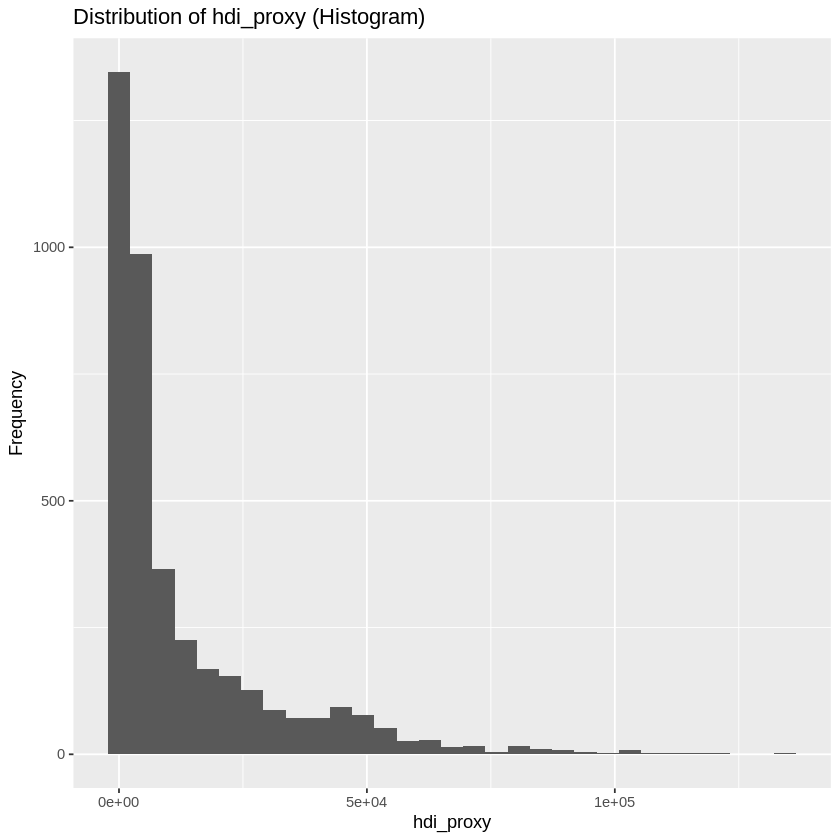

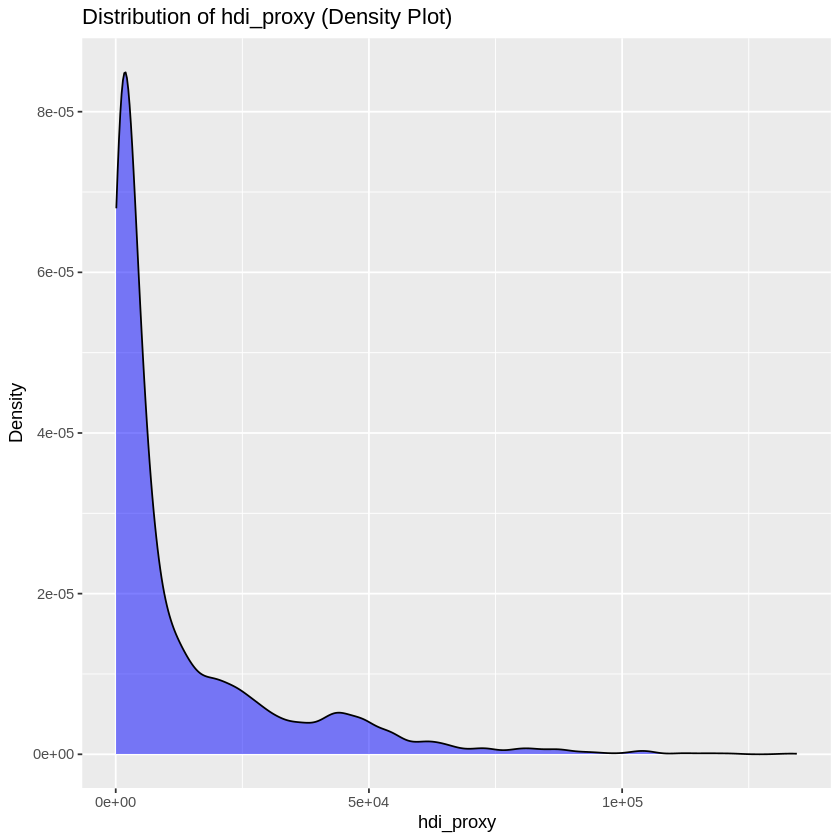

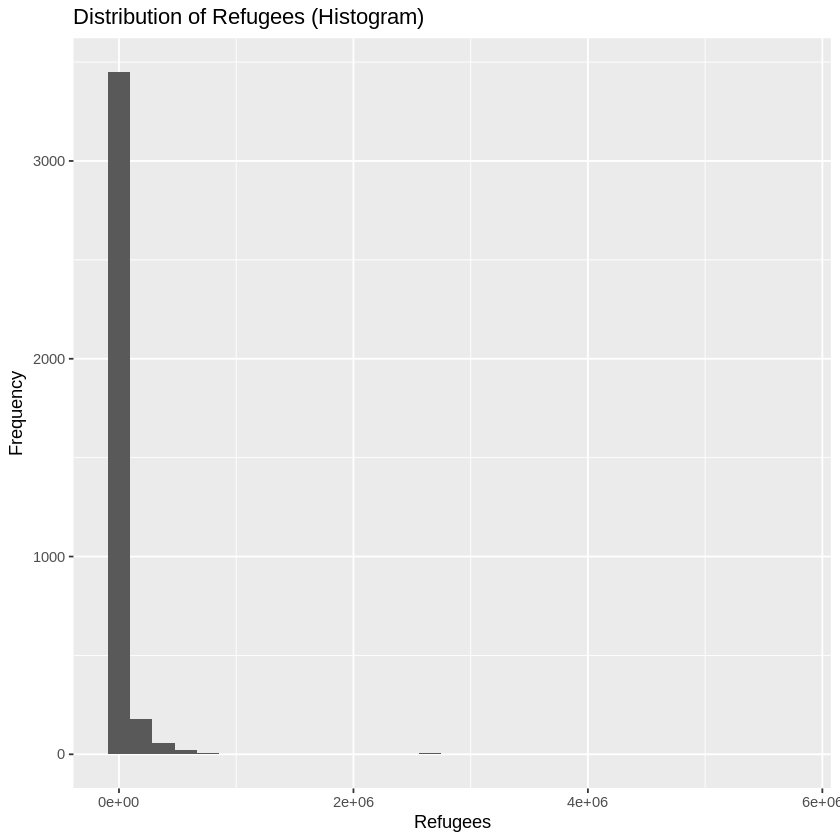

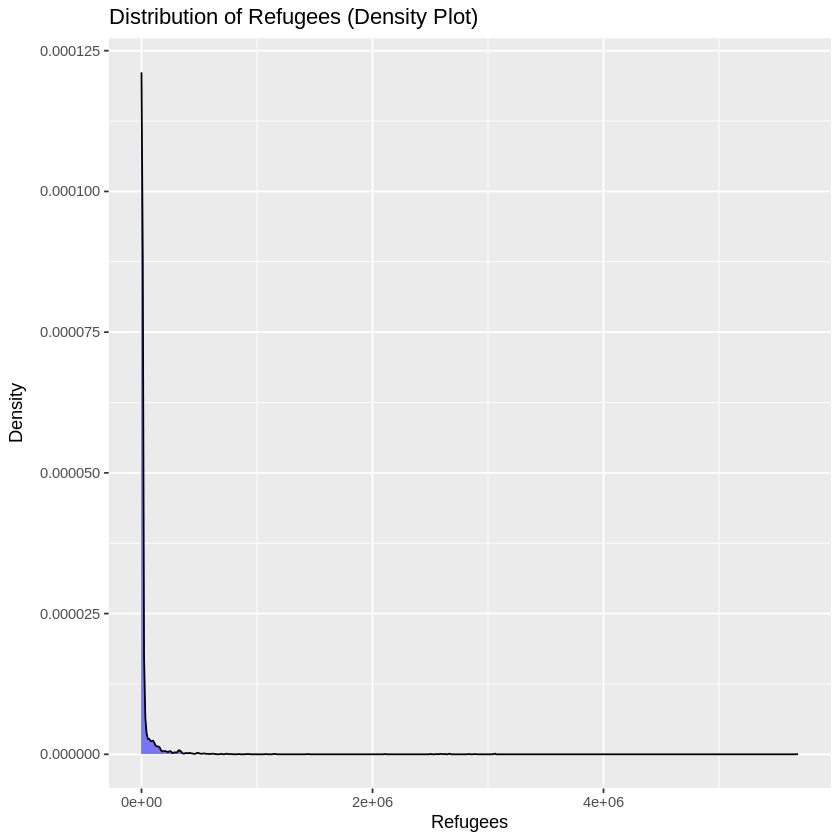

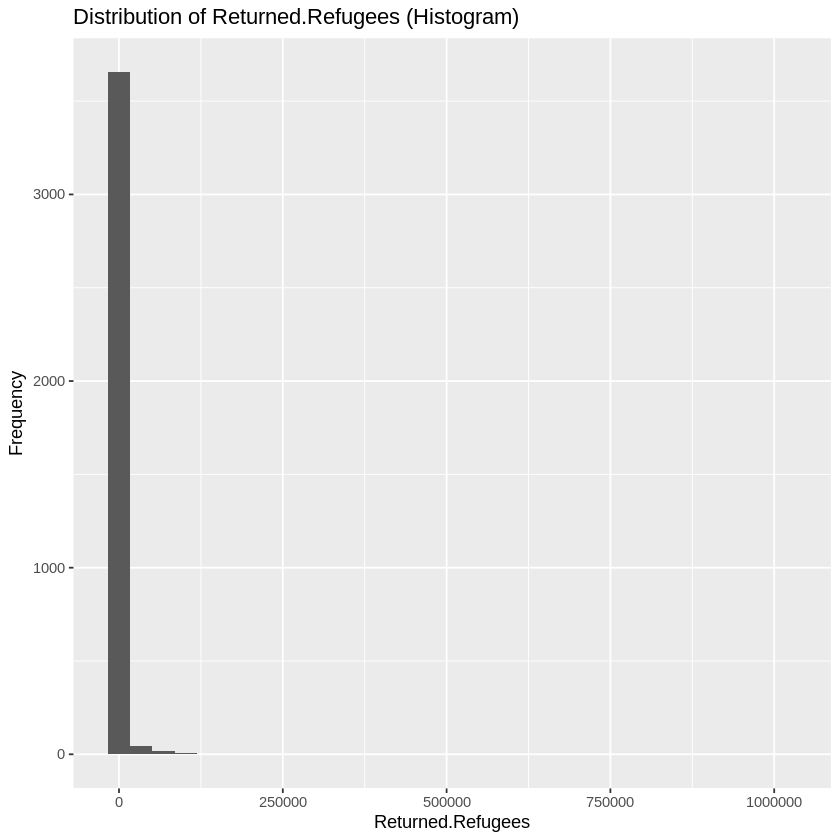

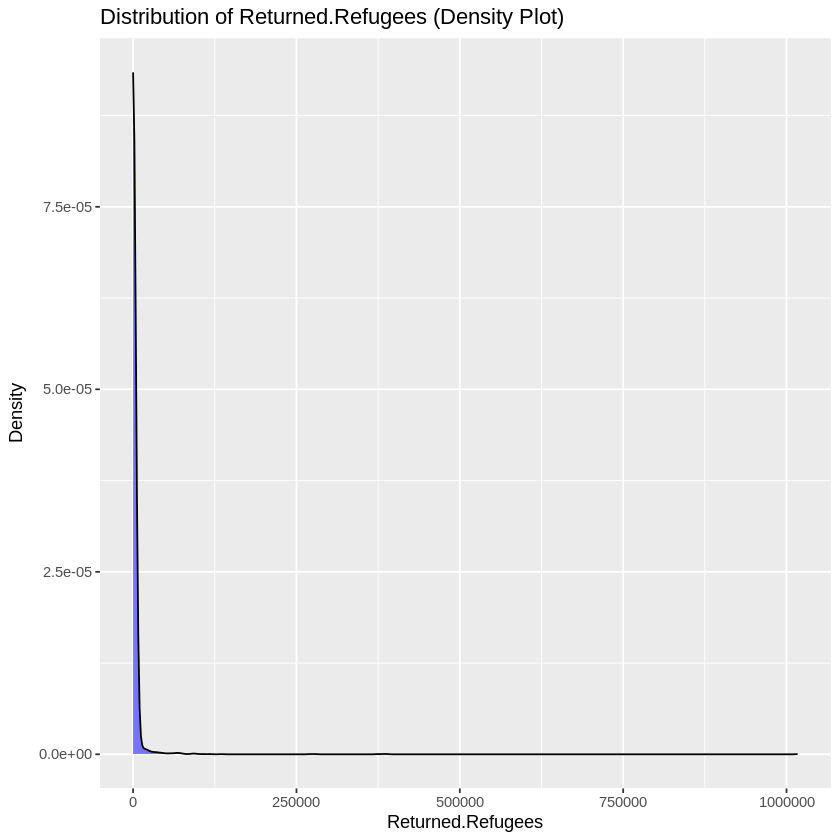

In [ ]:
# Select numerical columns for plotting distributions
numerical_cols_for_dist <- df[, c("edu_exp_gdp", "gdp_per_capita", "gov_exp_gdp", "unemployment_rate", "inflation_rate", "population", "urban_pop_percent", "education_index", "hdi_proxy", "Refugees", "Returned.Refugees")]

# Loop through numerical columns and create histograms and density plots
for (col_name in colnames(numerical_cols_for_dist)) {
  # Create histogram
  hist_plot <- ggplot(df, aes(x = .data[[col_name]])) +
    geom_histogram(binwidth = diff(range(df[[col_name]], na.rm = TRUE))/30, na.rm = TRUE) + # Auto binwidth and remove NA
    labs(title = paste("Distribution of", col_name, "(Histogram)"),
         x = col_name,
         y = "Frequency")
  print(hist_plot)

  # Create density plot
  density_plot <- ggplot(df, aes(x = .data[[col_name]])) +
    geom_density(fill = "blue", alpha = 0.5, na.rm = TRUE) + # Add fill and transparency and remove NA
    labs(title = paste("Distribution of", col_name, "(Density Plot)"),
         x = col_name,
         y = "Density")
  print(density_plot)
}

In [ ]:
# Print unique country names
print(unique(df$country))

  [1] "Afghanistan"                    "Albania"                       
  [3] "Algeria"                        "American Samoa"                
  [5] "Andorra"                        "Angola"                        
  [7] "Antigua and Barbuda"            "Argentina"                     
  [9] "Armenia"                        "Aruba"                         
 [11] "Australia"                      "Austria"                       
 [13] "Azerbaijan"                     "Bahamas, The"                  
 [15] "Bahrain"                        "Bangladesh"                    
 [17] "Barbados"                       "Belarus"                       
 [19] "Belgium"                        "Belize"                        
 [21] "Benin"                          "Bermuda"                       
 [23] "Bhutan"                         "Bolivia"                       
 [25] "Bosnia and Herzegovina"         "Botswana"                      
 [27] "Brazil"                         "British Virgin Islands" 

Warning message:
“Removed 26 rows containing missing values or values outside the scale range
(`geom_line()`).”


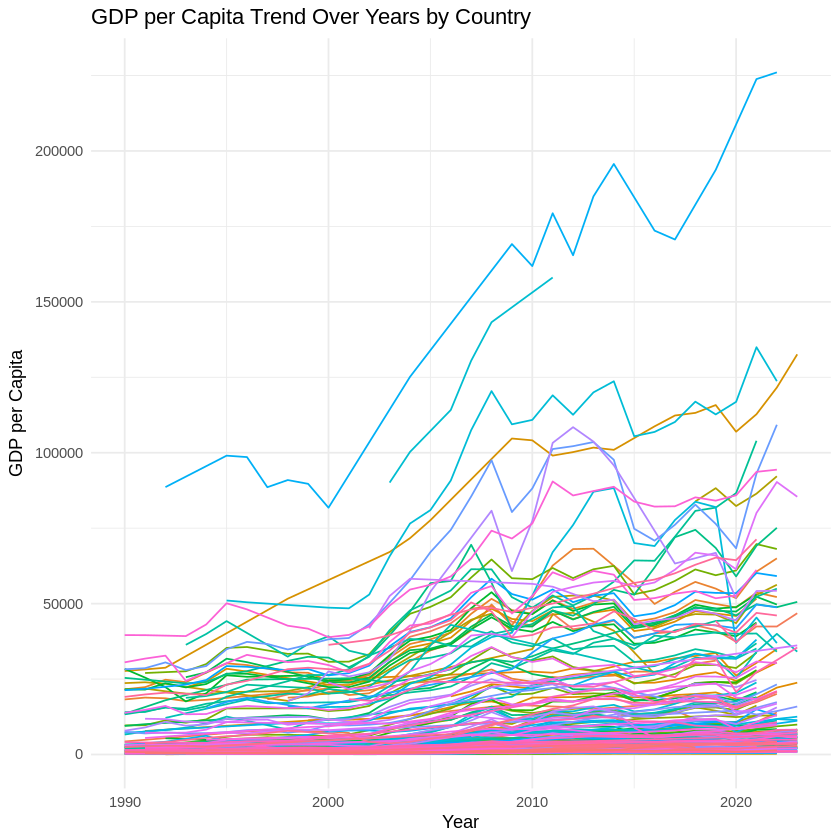

In [ ]:
library(ggplot2)

# Create a line plot of GDP per capita over the years for different countries
ggplot(df, aes(x = year, y = gdp_per_capita, group = country, color = country)) +
  geom_line() +
  labs(title = "GDP per Capita Trend Over Years by Country",
       x = "Year",
       y = "GDP per Capita") +
  theme_minimal() +
  theme(legend.position = "none") # Hide the legend as there are too many countries


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


`summarise()` has grouped output by 'income'. You can override using the
`.groups` argument.


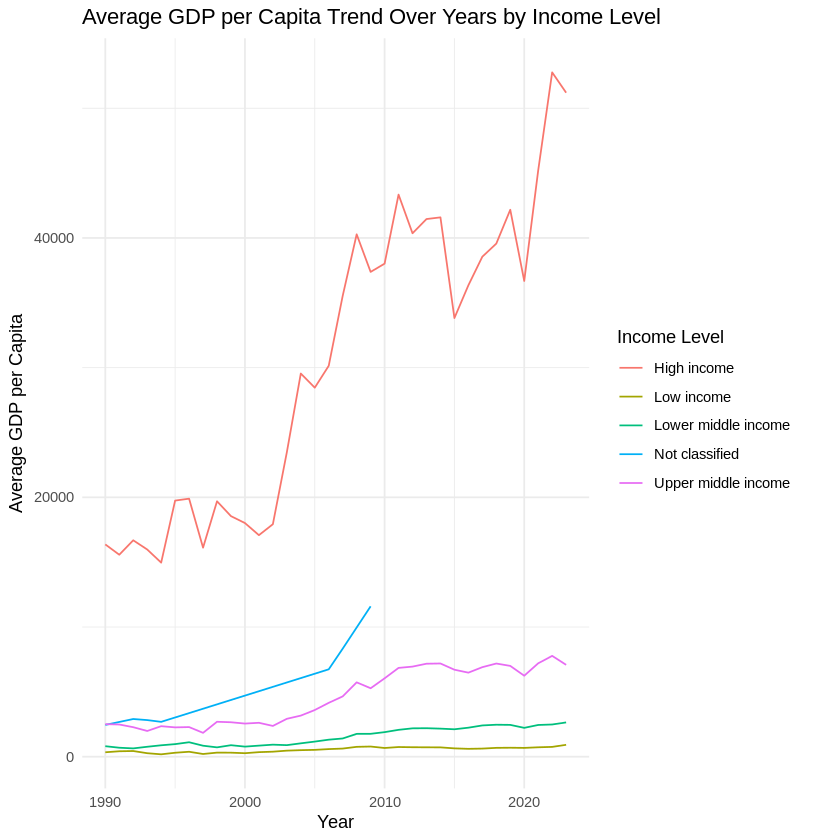

In [ ]:
library(dplyr)
library(ggplot2)

# Group the data by income level and year, then calculate the average GDP per capita for each group
gdp_by_income_year <- df %>%
  group_by(income, year) %>%
  summarise(avg_gdp_per_capita = mean(gdp_per_capita, na.rm = TRUE)) %>%
  ungroup()

# Create a line plot of average GDP per capita over the years by income level
ggplot(gdp_by_income_year, aes(x = year, y = avg_gdp_per_capita, color = income)) +
  geom_line() +
  labs(title = "Average GDP per Capita Trend Over Years by Income Level",
       x = "Year",
       y = "Average GDP per Capita",
       color = "Income Level") +
  theme_minimal()

`summarise()` has grouped output by 'income'. You can override using the
`.groups` argument.


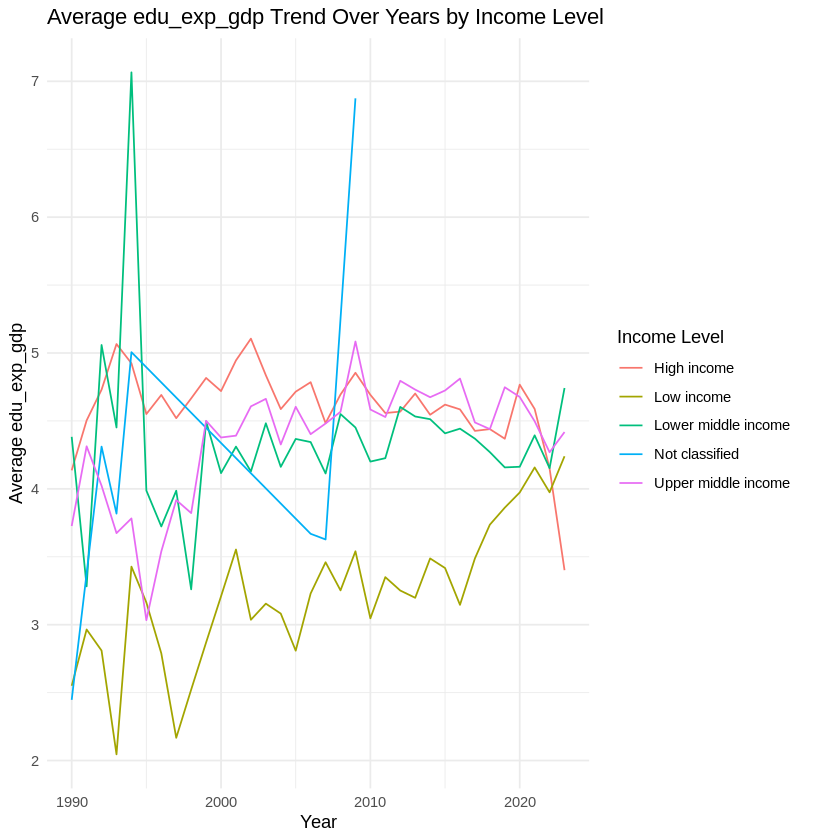

In [ ]:
# Group the data by income level and year, then calculate the average GDP per capita for each group
gdp_by_income_year <- df %>%
  group_by(income, year) %>%
  summarise(avg_edu_exp_gdp = mean(edu_exp_gdp, na.rm = TRUE)) %>%
  ungroup()

# Create a line plot of average GDP per capita over the years by income level
ggplot(gdp_by_income_year, aes(x = year, y = avg_edu_exp_gdp, color = income)) +
  geom_line() +
  labs(title = "Average edu_exp_gdp Trend Over Years by Income Level",
       x = "Year",
       y = "Average edu_exp_gdp",
       color = "Income Level") +
  theme_minimal()

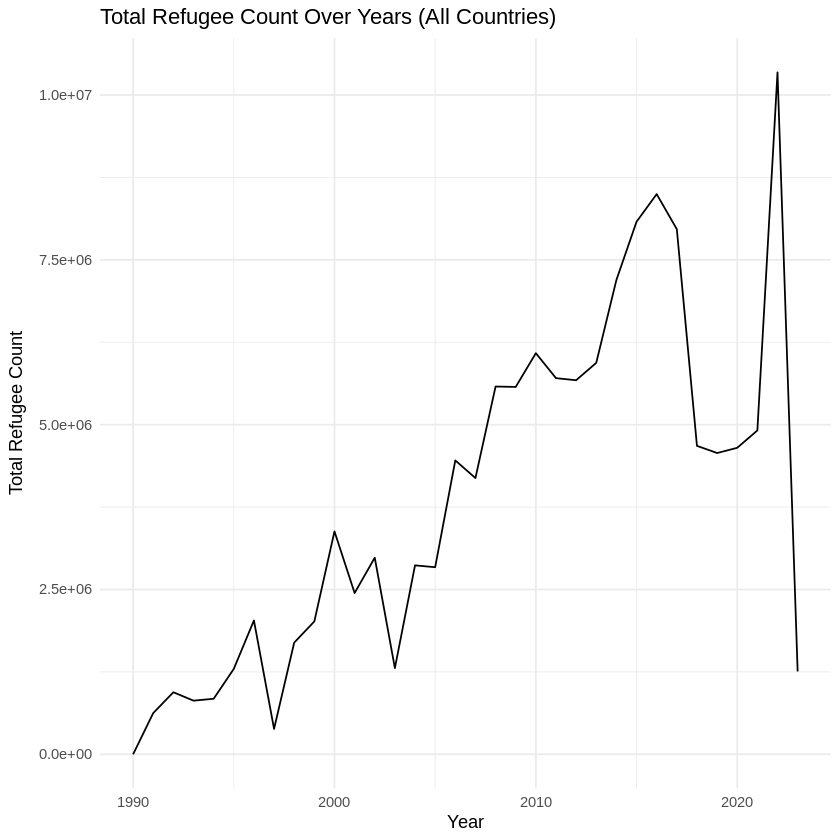

In [ ]:
library(dplyr)
library(ggplot2)

# Group the data by year and calculate the total refugee count for each year
total_refugees_by_year <- df %>%
  group_by(year) %>%
  summarise(total_refugees = sum(Refugees, na.rm = TRUE)) %>%
  ungroup()

# Create a line plot of total refugee count over the years
ggplot(total_refugees_by_year, aes(x = year, y = total_refugees)) +
  geom_line() +
  labs(title = "Total Refugee Count Over Years (All Countries)",
       x = "Year",
       y = "Total Refugee Count") +
  theme_minimal()

In [ ]:
library(dplyr)

# Group the dataframe by the 'country' column
df_grouped_by_country <- df %>%
  group_by(country)

In [ ]:
library(ggplot2)

# Get unique country names
unique_countries <- unique(df$country)

# Loop through each country and create a separate plot
for (country_name in unique_countries) {
  # Filter data for the current country
  df_country <- df[df$country == country_name, ]

  # Create a line plot of Refugee count over the years for the current country
  refugee_plot <- ggplot(df_country, aes(x = year, y = Refugees)) +
    geom_line() + # Add lines
    labs(title = paste("Refugee Count Over Years in", country_name),
         x = "Year",
         y = "Refugee Count") +
    theme_minimal()

  # Print the plot
  print(refugee_plot)
}

Output hidden; open in https://colab.research.google.com to view.

## Basic scatter plot
Create a scatter plot to visualize the relationship between two continuous variables, such as GDP per capita and education expenditure.


Warning message:
“Removed 26 rows containing missing values or values outside the scale range
(`geom_point()`).”


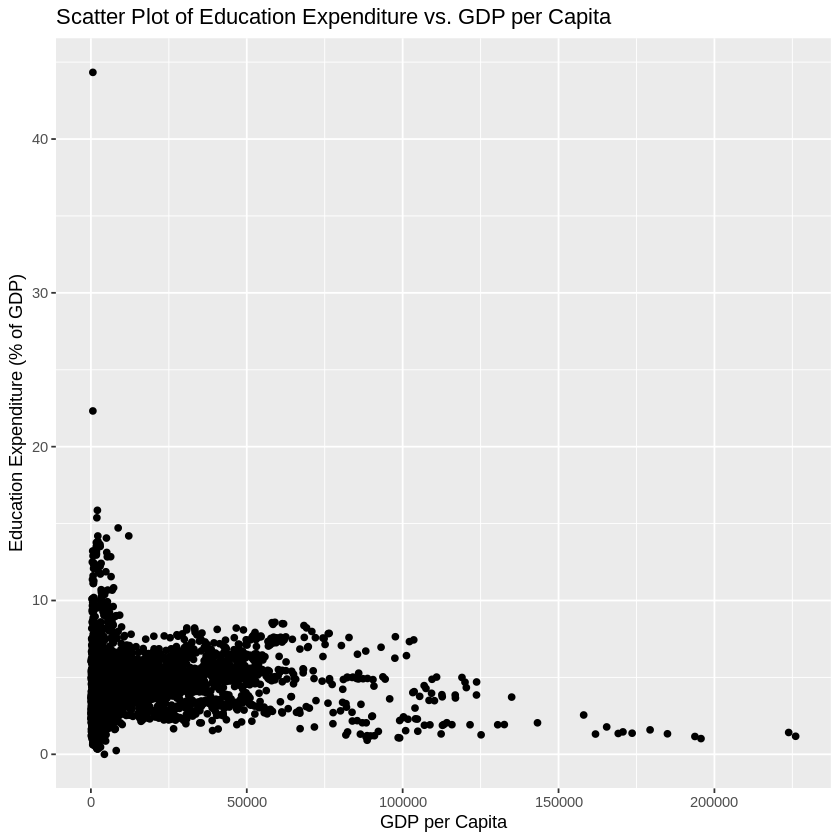

In [ ]:
library(ggplot2)

# Create the scatter plot
ggplot(df, aes(x = gdp_per_capita, y = edu_exp_gdp)) +
  geom_point() +
  labs(title = "Scatter Plot of Education Expenditure vs. GDP per Capita",
       x = "GDP per Capita",
       y = "Education Expenditure (% of GDP)")

## Adding aesthetics and layers

Enhance the scatter plot by mapping additional variables to aesthetics like color, size, or shape.


Enhance the basic scatter plot by mapping 'income' to color and 'Refugees' to size to visualize the relationship between GDP per capita, education expenditure, income level, and refugee numbers. Add appropriate labels to reflect the added aesthetics.



Warning message:
“Removed 365 rows containing missing values or values outside the scale range
(`geom_point()`).”


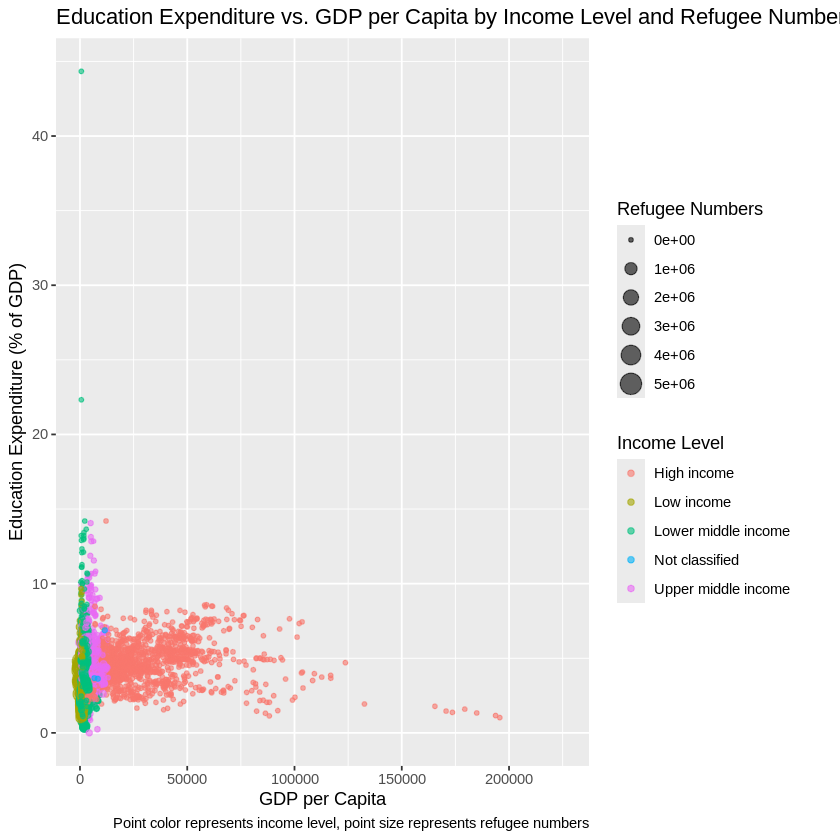

In [ ]:
ggplot(df, aes(x = gdp_per_capita, y = edu_exp_gdp, color = income, size = Refugees)) +
  geom_point(alpha = 0.6) + # Add some transparency to points
  labs(title = "Education Expenditure vs. GDP per Capita by Income Level and Refugee Numbers",
       x = "GDP per Capita",
       y = "Education Expenditure (% of GDP)",
       color = "Income Level",
       size = "Refugee Numbers",
       caption = "Point color represents income level, point size represents refugee numbers")

## Creating bar charts

Generate bar charts to show the distribution of categorical variables or the relationship between a categorical variable and a continuous variable (e.g., average GDP per capita by income level).


Create a bar chart to visualize the count of countries within each income level category and a bar chart to visualize the average GDP per capita for each income level.



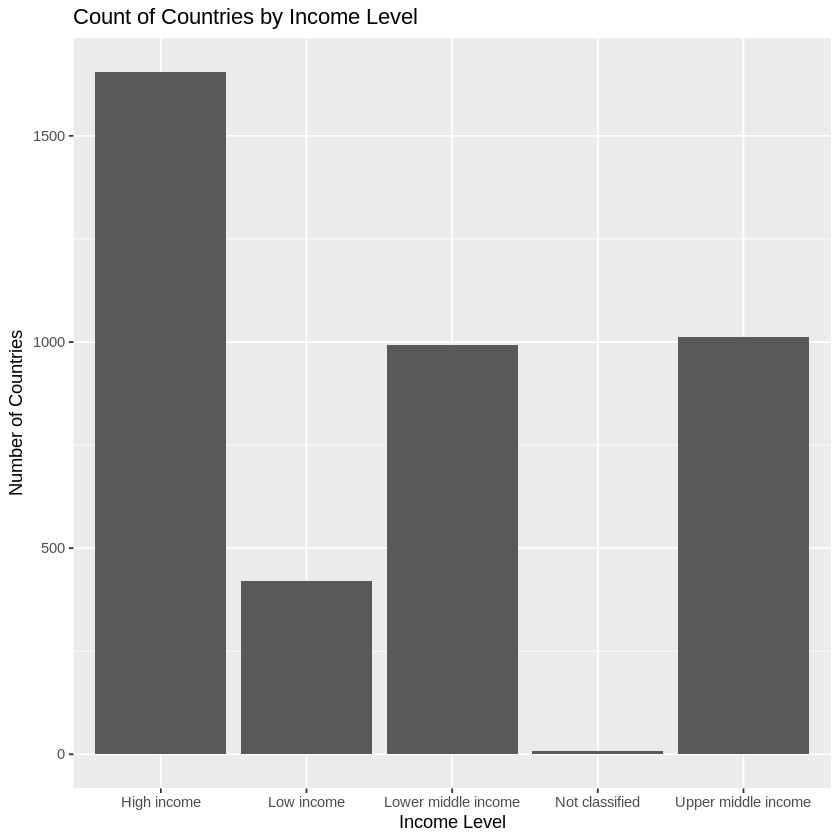

In [ ]:
# Create a bar chart for the count of countries by income level
ggplot(df, aes(x = income)) +
  geom_bar() +
  labs(title = "Count of Countries by Income Level",
       x = "Income Level",
       y = "Number of Countries")

# Calculate the average gdp_per_capita for each income level
avg_gdp_by_income <- aggregate(gdp_per_capita ~ income, data = df, FUN = mean)

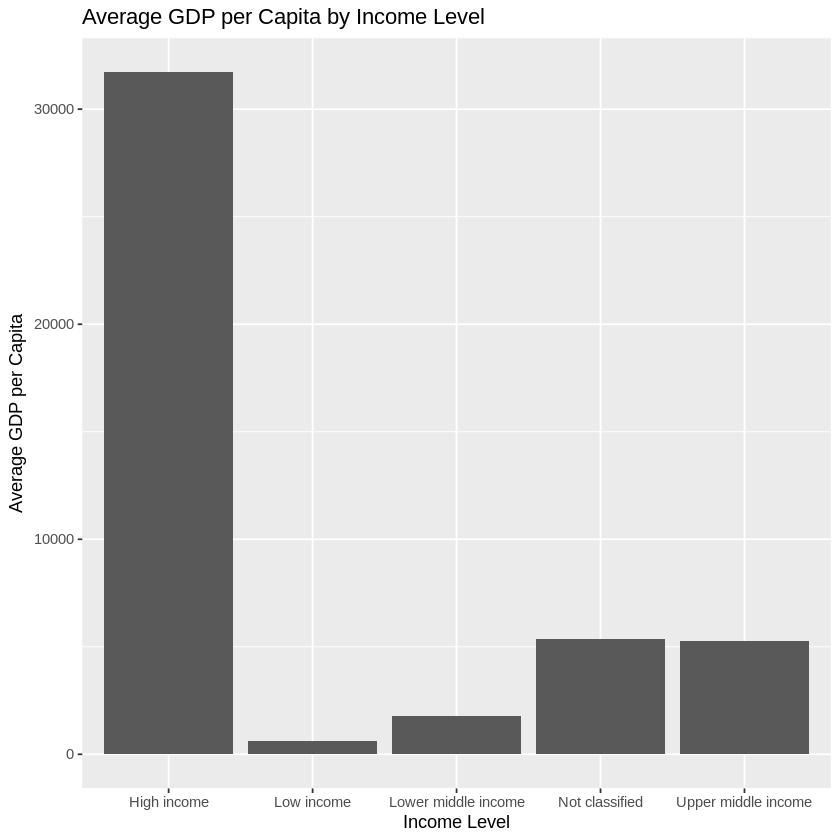

In [ ]:
# Create a bar chart for the average gdp_per_capita by income level
ggplot(avg_gdp_by_income, aes(x = income, y = gdp_per_capita)) +
  geom_bar(stat = "identity") +
  labs(title = "Average GDP per Capita by Income Level",
       x = "Income Level",
       y = "Average GDP per Capita")

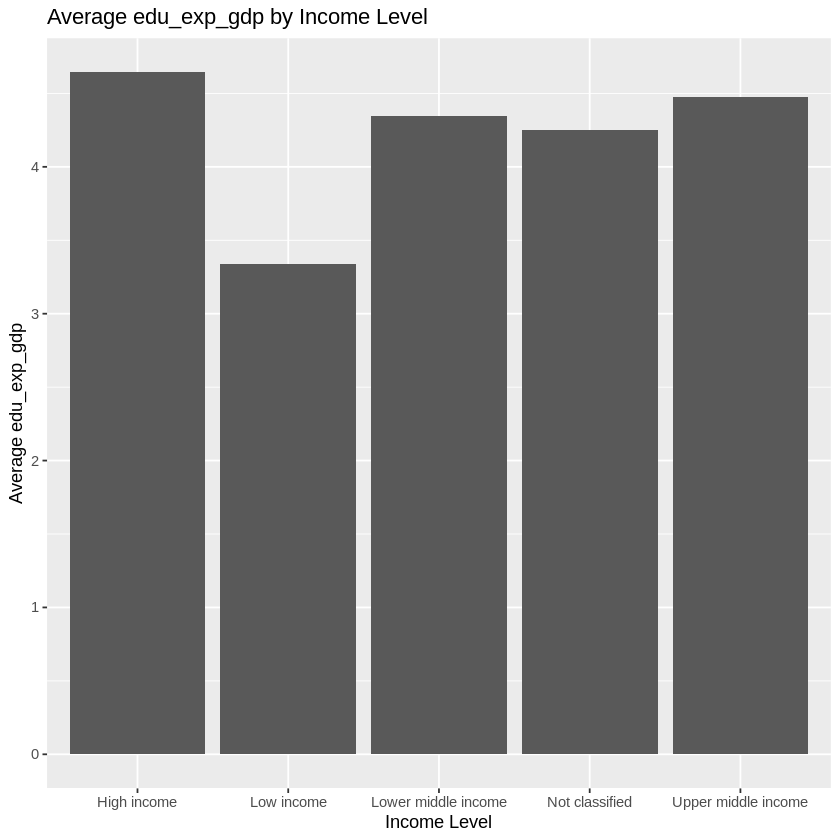

In [ ]:

# Calculate the average edu_exp_gdp for each income level
avg_edu_exp_gdp <- aggregate(edu_exp_gdp ~ income, data = df, FUN = mean)

# Create a bar chart for the average edu_exp_gdp by income level
ggplot(avg_edu_exp_gdp, aes(x = income, y = edu_exp_gdp)) +
  geom_bar(stat = "identity") +
  labs(title = "Average edu_exp_gdp by Income Level",
       x = "Income Level",
       y = "Average edu_exp_gdp")

## Visualizing trends over time

Create line plots to show trends of variables like GDP per capita or refugee counts over the years.


Create the first line plot showing GDP per capita trends over the years, colored by income level.



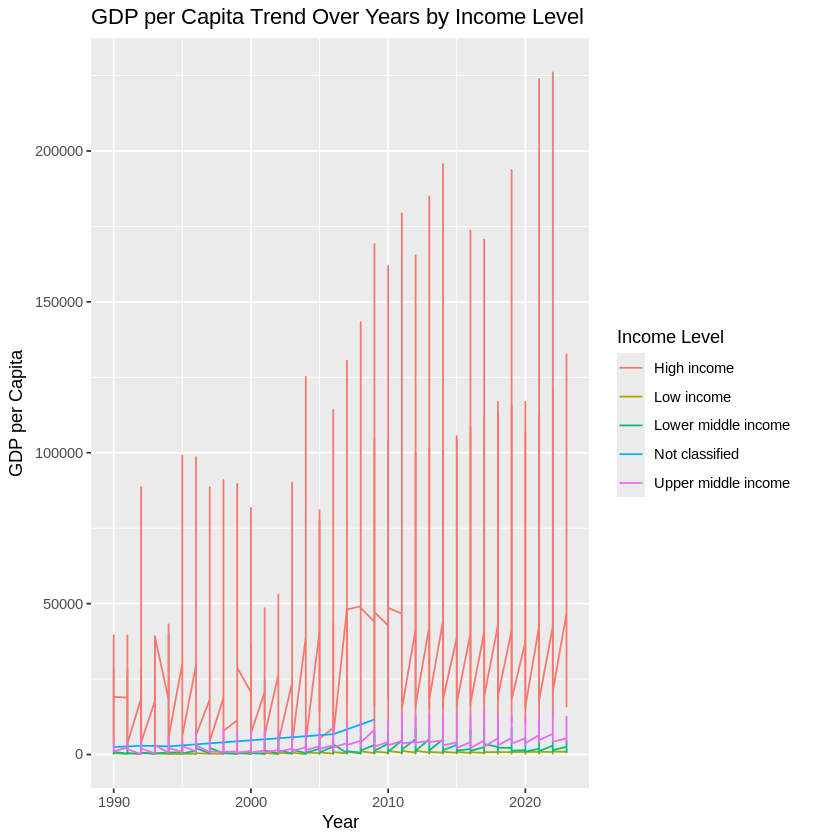

In [ ]:
# Ensure Year is treated as numeric
df$year <- as.numeric(df$year)

# Create line plot for GDP per capita trend by income level
gdp_plot <- ggplot(df, aes(x = year, y = gdp_per_capita, color = income)) +
  geom_line() +
  labs(title = "GDP per Capita Trend Over Years by Income Level",
       x = "Year",
       y = "GDP per Capita",
       color = "Income Level")

# Display the plot
print(gdp_plot)


Create the second line plot showing the trend of refugee counts over the years, colored by income level to see if there's a pattern.



Warning message:
“Removed 57 rows containing missing values or values outside the scale range
(`geom_line()`).”


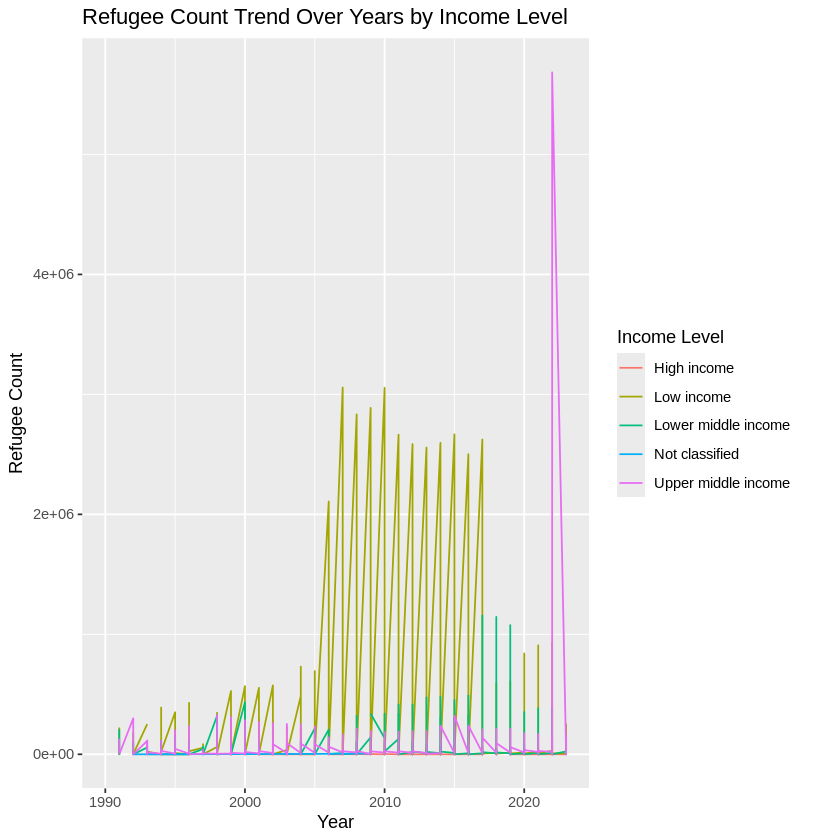

In [ ]:
# Create line plot for Refugees trend by income level
refugees_plot <- ggplot(df, aes(x = year, y = Refugees, color = income)) +
  geom_line() +
  labs(title = "Refugee Count Trend Over Years by Income Level",
       x = "Year",
       y = "Refugee Count",
       color = "Income Level")

# Display the plot
print(refugees_plot)

## Using faceting for subgroup comparisons

Use `facet_wrap()` or `facet_grid()` to create multiple plots based on a categorical variable (e.g., separate plots for different income levels).


Create a scatter plot and add a faceting layer to create separate plots for each income level. Also, add appropriate titles and labels.



Warning message:
“Removed 26 rows containing missing values or values outside the scale range
(`geom_point()`).”


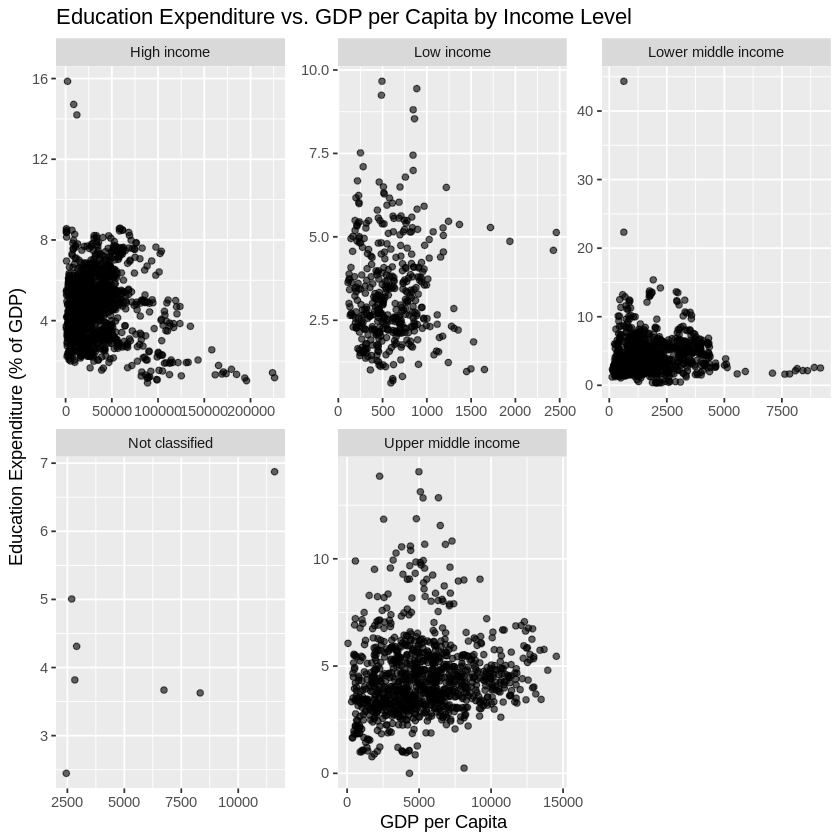

In [ ]:
# Create a scatter plot with faceting by income level
ggplot(df, aes(x = gdp_per_capita, y = edu_exp_gdp)) +
  geom_point(alpha = 0.6) + # Add some transparency
  facet_wrap(~income, scales = "free") + # Facet by income level
  labs(title = "Education Expenditure vs. GDP per Capita by Income Level",
       x = "GDP per Capita",
       y = "Education Expenditure (% of GDP)")

## Customizing plots with themes

Demonstrate how to use `theme_minimal()` and other theme elements to customize the appearance of plots.


theme_minimal() in ggplot2 is a predefined theme that provides a clean and minimalist look to your plots. It removes some of the default visual elements like the background color, major and minor grid lines, and the box around the plot, resulting in a simpler and less cluttered appearance. It's often a good starting point for creating professional-looking plots as it emphasizes the data itself.

Create a scatter plot with GDP per capita on the x-axis and education expenditure on the y-axis, add points, labels, apply a minimal theme, customize the plot title, and display the plot.



Warning message:
“Removed 26 rows containing missing values or values outside the scale range
(`geom_point()`).”


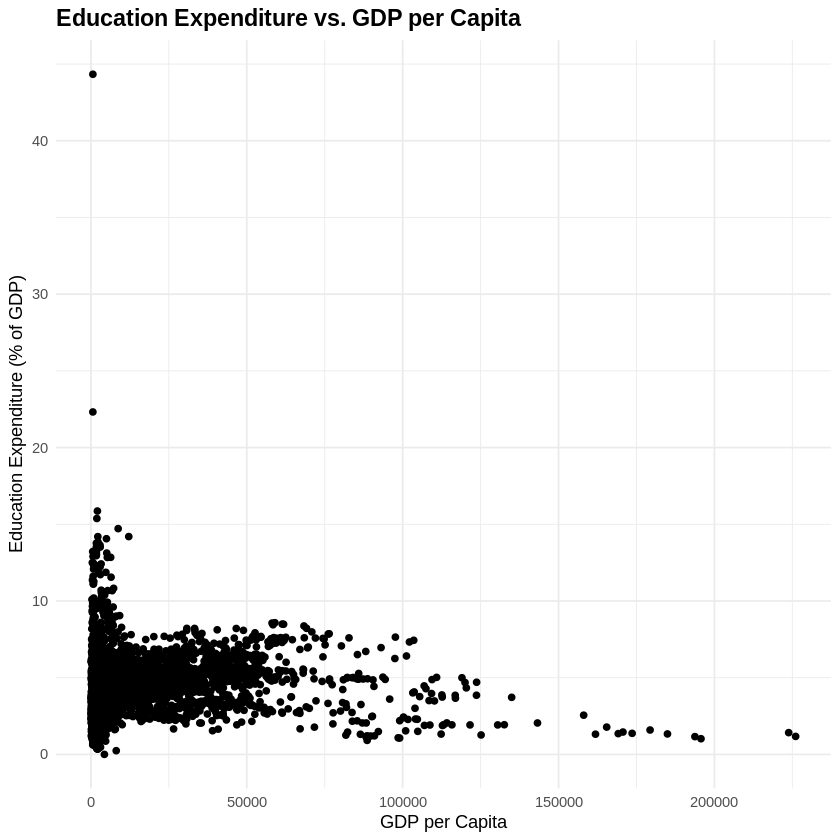

In [ ]:
# Create a scatter plot
plot <- ggplot(df, aes(x = gdp_per_capita, y = edu_exp_gdp)) +
  geom_point() + # Add points
  labs(title = "Education Expenditure vs. GDP per Capita",
       x = "GDP per Capita",
       y = "Education Expenditure (% of GDP)") + # Add labels and title
  theme_minimal() + # Apply minimal theme
  theme(plot.title = element_text(size = 14, face = "bold")) # Customize title appearance

# Display the plot
print(plot)

## Creating histograms and density plots

Visualize the distribution of a single continuous variable using histograms and density plots.


Create a histogram and a density plot for `gdp_per_capita` and display them.



Warning message:
“Removed 26 rows containing non-finite outside the scale range (`stat_bin()`).”


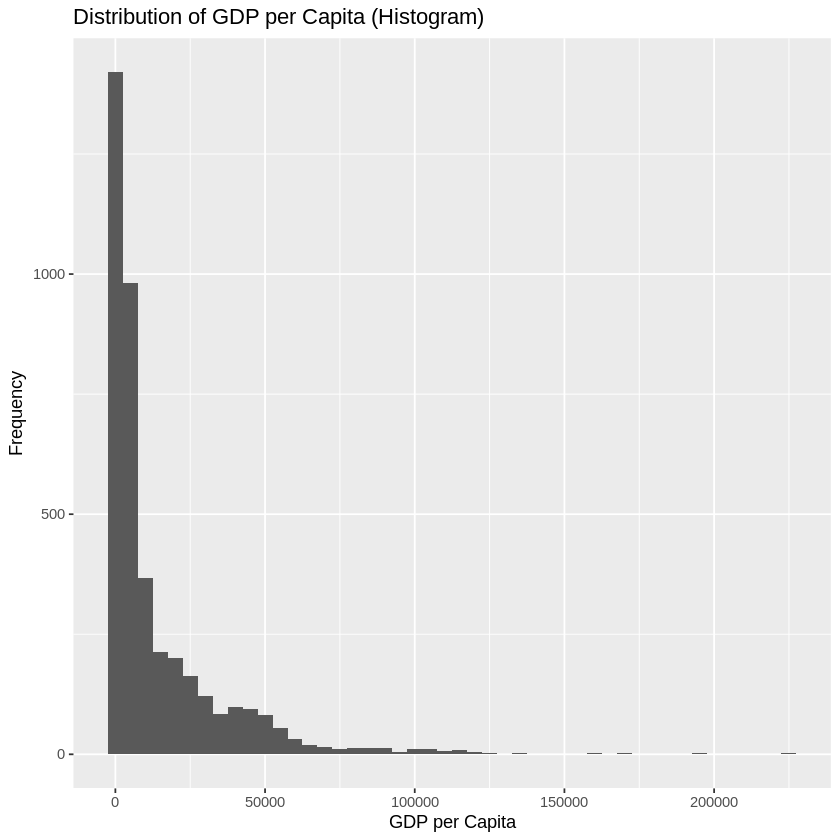

In [ ]:
library(ggplot2)

# Create a histogram for gdp_per_capita
hist_plot <- ggplot(df, aes(x = gdp_per_capita)) +
  geom_histogram(binwidth = 5000) + # Adjust binwidth as needed
  labs(title = "Distribution of GDP per Capita (Histogram)",
       x = "GDP per Capita",
       y = "Frequency")

# Display the plots
print(hist_plot)

Warning message:
“Removed 26 rows containing non-finite outside the scale range
(`stat_density()`).”


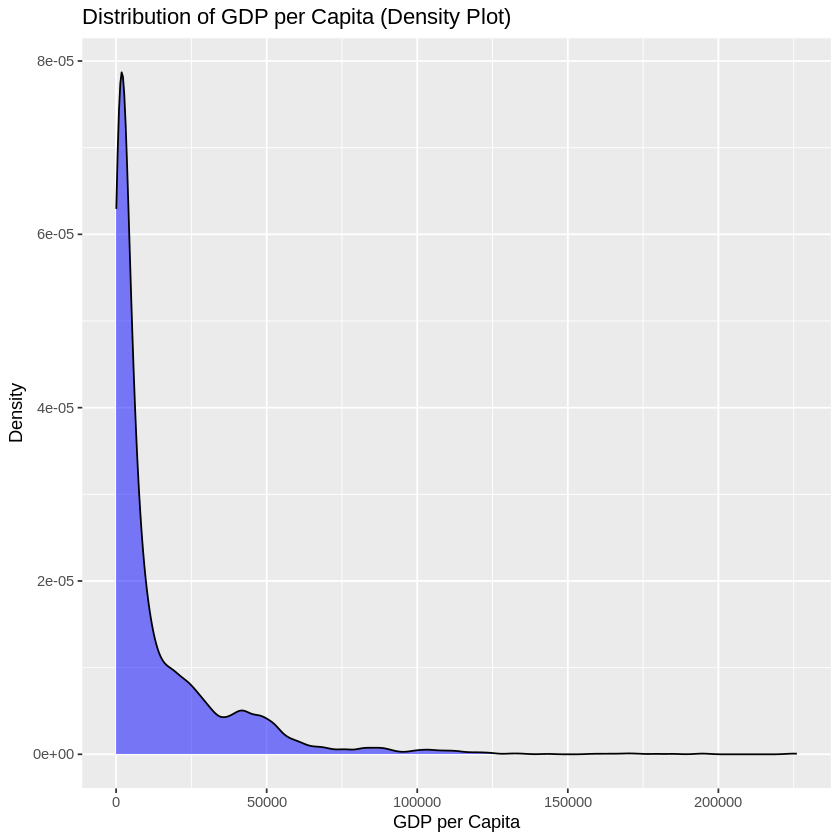

In [ ]:
# Create a density plot for gdp_per_capita
density_plot <- ggplot(df, aes(x = gdp_per_capita)) +
  geom_density(fill = "blue", alpha = 0.5) + # Add fill and transparency
  labs(title = "Distribution of GDP per Capita (Density Plot)",
       x = "GDP per Capita",
       y = "Density")

# Display the plots
print(density_plot)

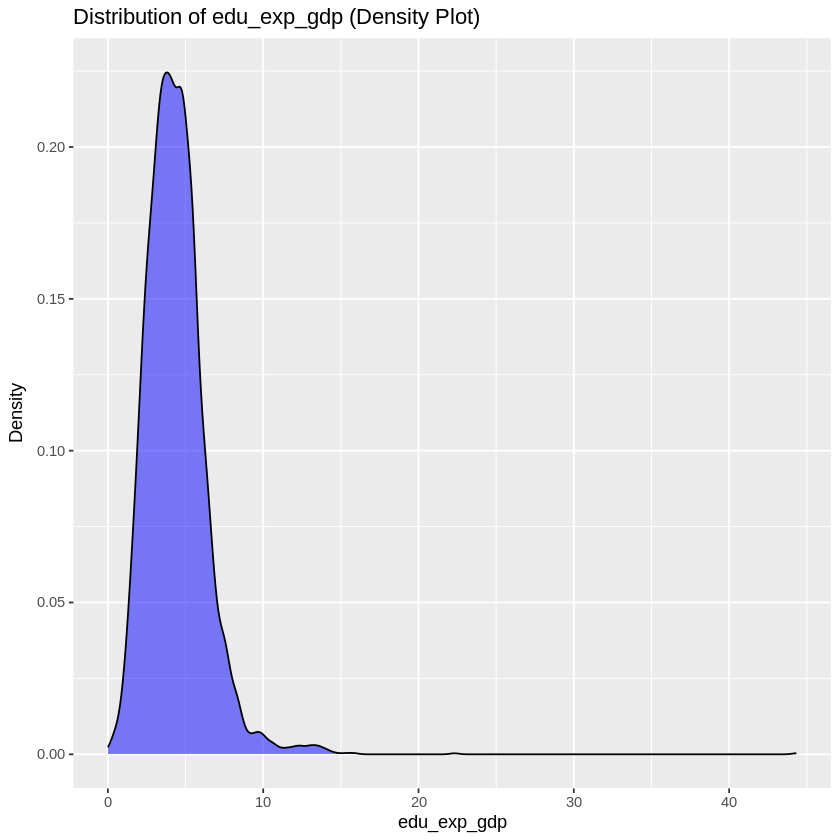

In [ ]:
# Create a density plot for gdp_per_capita
density_plot <- ggplot(df, aes(x = edu_exp_gdp)) +
  geom_density(fill = "blue", alpha = 0.5) + # Add fill and transparency
  labs(title = "Distribution of edu_exp_gdp (Density Plot)",
       x = "edu_exp_gdp",
       y = "Density")

# Display the plots
print(density_plot)

Combine the histogram and density plot for `gdp_per_capita` for a better visualization of the distribution shape and display the combined plot.



Warning message:
“Removed 26 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 26 rows containing non-finite outside the scale range
(`stat_density()`).”


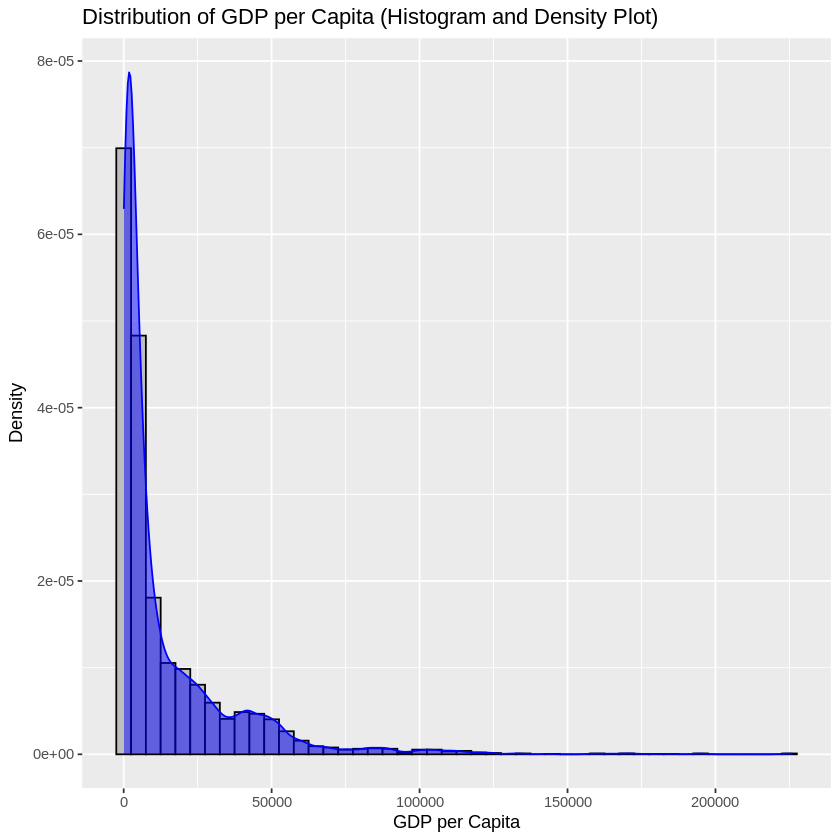

In [ ]:
# Create a combined histogram and density plot for gdp_per_capita
combined_plot <- ggplot(df, aes(x = gdp_per_capita)) +
  geom_histogram(aes(y = ..density..), binwidth = 5000, fill = "grey", color = "black") + # Use density scale for histogram
  geom_density(color = "blue", fill = "blue", alpha = 0.5) + # Add density line and fill
  labs(title = "Distribution of GDP per Capita (Histogram and Density Plot)",
       x = "GDP per Capita",
       y = "Density")

# Display the combined plot
print(combined_plot)

## Box plots for distribution comparison

Use box plots to compare the distribution of a continuous variable across different categories.


Create a box plot using ggplot() with income on the x-axis and gdp_per_capita on the y-axis to compare the distribution of GDP per capita across different income levels, and add a title and appropriate labels to the x and y axes using labs().



Warning message:
“Removed 26 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


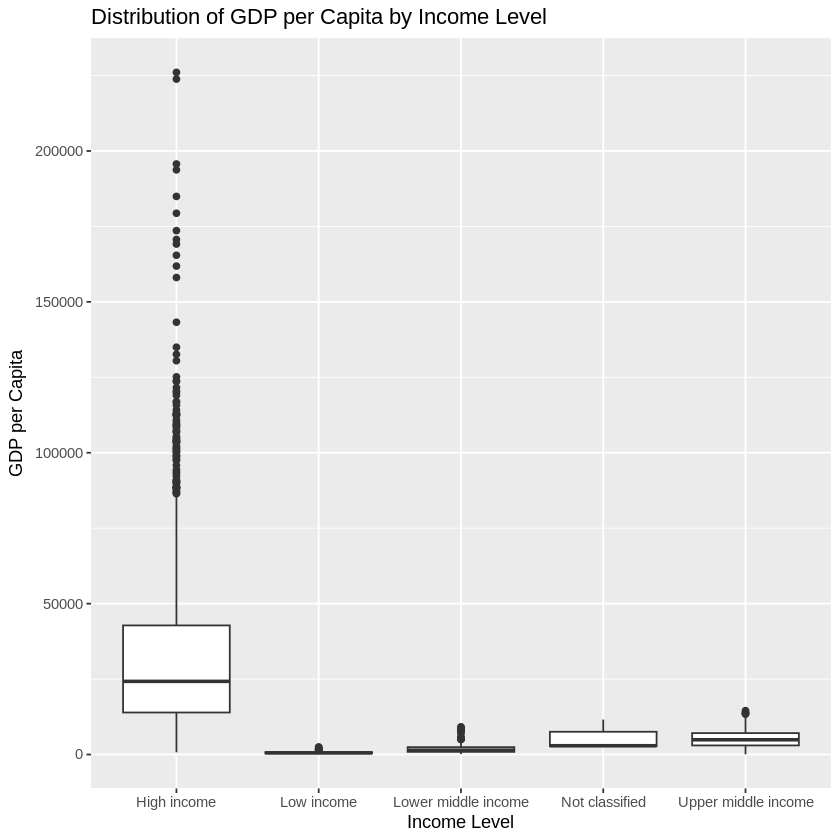

In [ ]:
library(ggplot2)

# Create a box plot of GDP per capita by income level
ggplot(df, aes(x = income, y = gdp_per_capita)) +
  geom_boxplot() +
  labs(title = "Distribution of GDP per Capita by Income Level",
       x = "Income Level",
       y = "GDP per Capita")

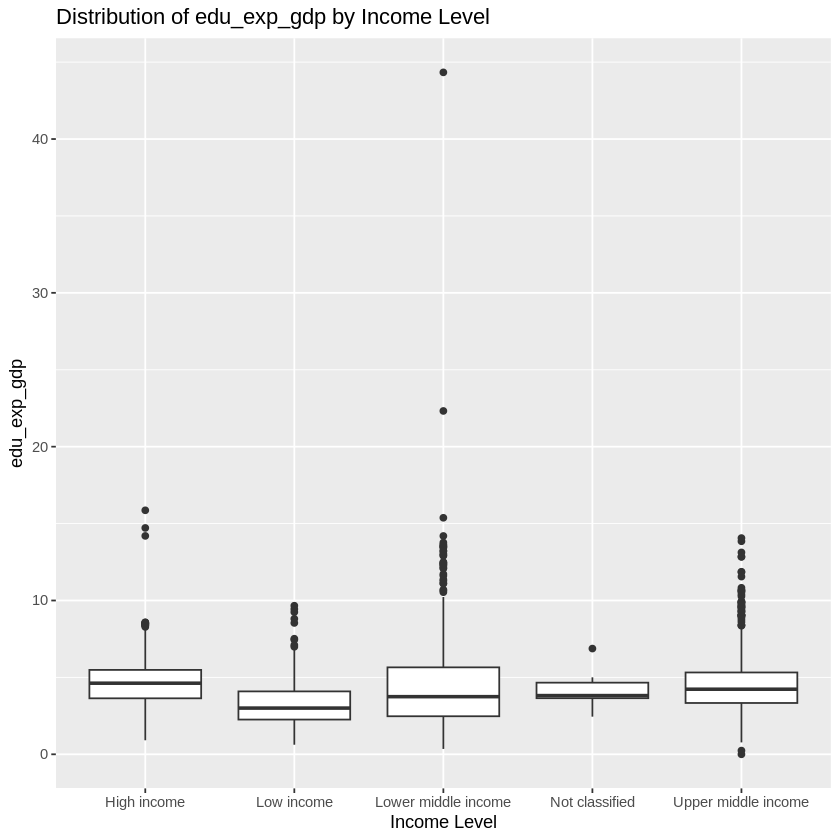

In [ ]:
library(ggplot2)

# Create a box plot of GDP per capita by income level
ggplot(df, aes(x = income, y = edu_exp_gdp)) +
  geom_boxplot() +
  labs(title = "Distribution of edu_exp_gdp by Income Level",
       x = "Income Level",
       y = "edu_exp_gdp")

## Creating maps (optional but recommended)

If possible with the data, create a world map visualizing a variable like refugee counts or GDP per capita by country.



Load the required libraries for world map data and obtain the world map data.



In [ ]:
install.packages("rnaturalearth")
install.packages("rnaturalearthdata")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘s2’, ‘units’, ‘sf’, ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Load the required libraries for world map data and obtain the world map data.



In [ ]:
library(rnaturalearth)
library(rnaturalearthdata)

# Obtain world map data
world_map <- ne_countries(scale = "medium", returnclass = "sf")


Attaching package: ‘rnaturalearthdata’


The following object is masked from ‘package:rnaturalearth’:

    countries110




Merge the world map data with the dataframe based on the country ISO codes and create a world map visualizing GDP per capita.



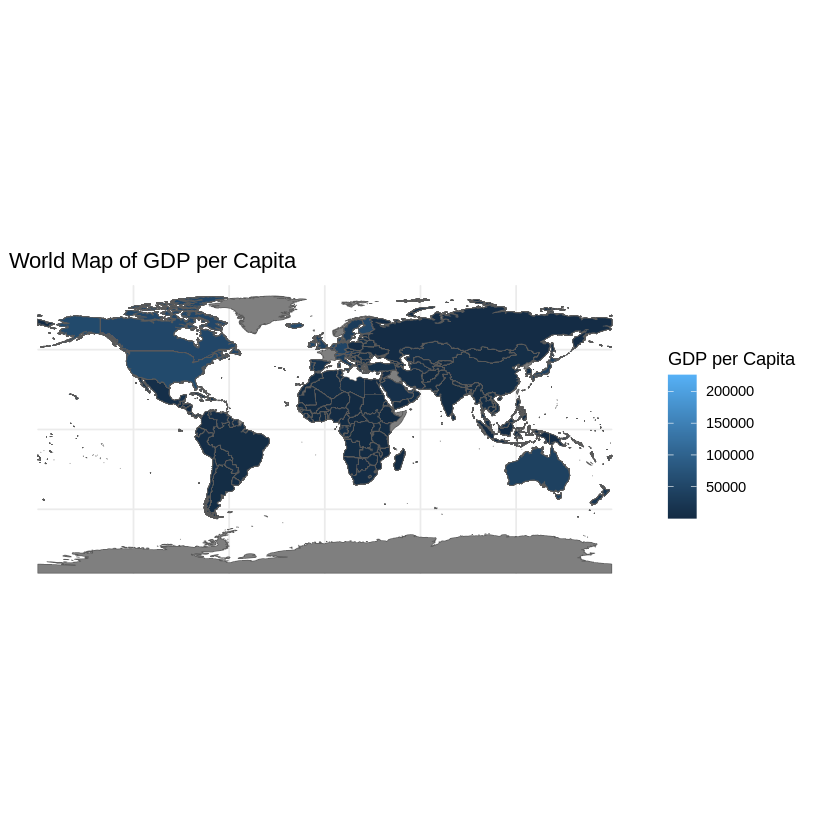

In [ ]:
# Merge the world map data with the dataframe
merged_map_data <- merge(world_map, df, by.x = "iso_a3", by.y = "iso3c", all.x = TRUE)

# Create a world map visualizing GDP per capita
ggplot(data = merged_map_data) +
  geom_sf(aes(fill = gdp_per_capita)) +
  labs(title = "World Map of GDP per Capita",
       fill = "GDP per Capita") +
  theme_minimal()

In [ ]:
colnames(df)

[1] "country"               "iso2c"                 "iso3c"                
 [4] "year"                  "lastupdated"           "edu_exp_gdp"          
 [7] "gdp_per_capita"        "gov_exp_gdp"           "unemployment_rate"    
[10] "inflation_rate"        "population"            "urban_pop_percent"    
[13] "education_index"       "hdi_proxy"             "region"               
[16] "capital"               "longitude"             "latitude"             
[19] "income"                "lending"               "Country.of.Asylum"    
[22] "Country.of.Origin"     "Country.of.Asylum.ISO" "Refugees"             
[25] "Returned.Refugees"     "Asylum.Seekers"        "IDPs"                 
[28] "Returned.IDPs"         "Stateless"             "HST"                  
[31] "OOC"

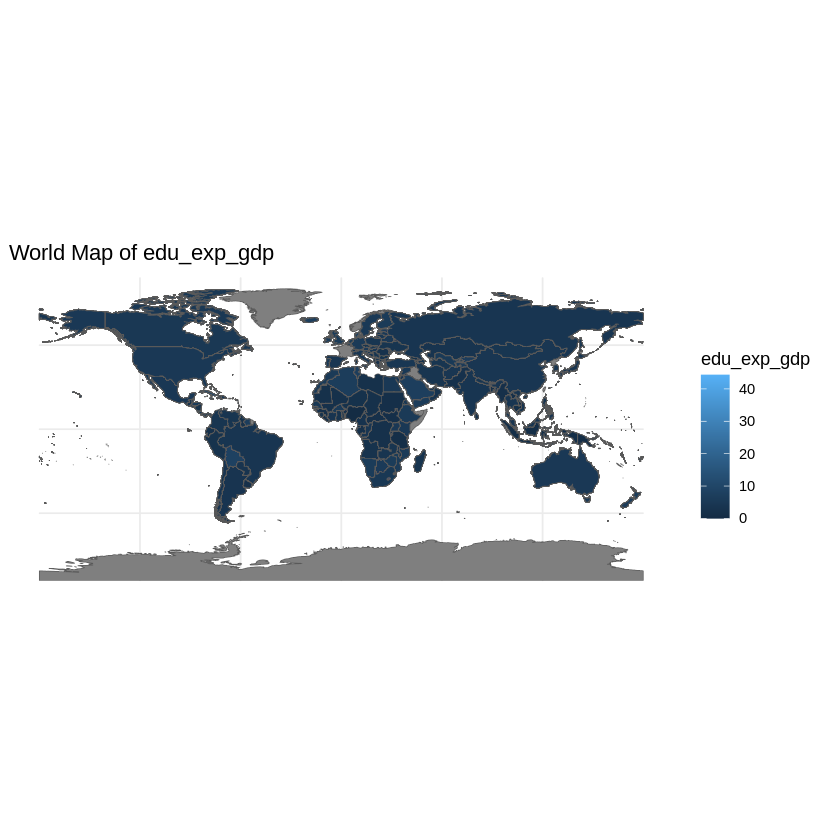

In [ ]:
# Merge the world map data with the dataframe
merged_map_data <- merge(world_map, df, by.x = "iso_a3", by.y = "iso3c", all.x = TRUE)

# Create a world map visualizing GDP per capita
ggplot(data = merged_map_data) +
  geom_sf(aes(fill = edu_exp_gdp)) +
  labs(title = "World Map of edu_exp_gdp",
       fill = "edu_exp_gdp") +
  theme_minimal()

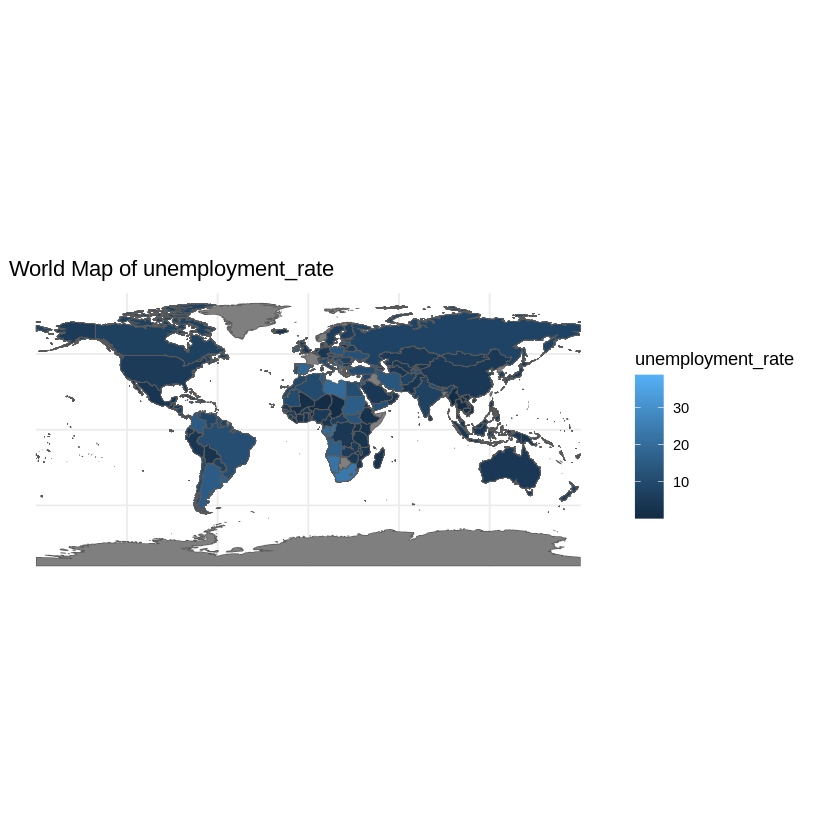

In [ ]:
# Merge the world map data with the dataframe
merged_map_data <- merge(world_map, df, by.x = "iso_a3", by.y = "iso3c", all.x = TRUE)

# Create a world map visualizing GDP per capita
ggplot(data = merged_map_data) +
  geom_sf(aes(fill = unemployment_rate)) +
  labs(title = "World Map of unemployment_rate",
       fill = "unemployment_rate") +
  theme_minimal()

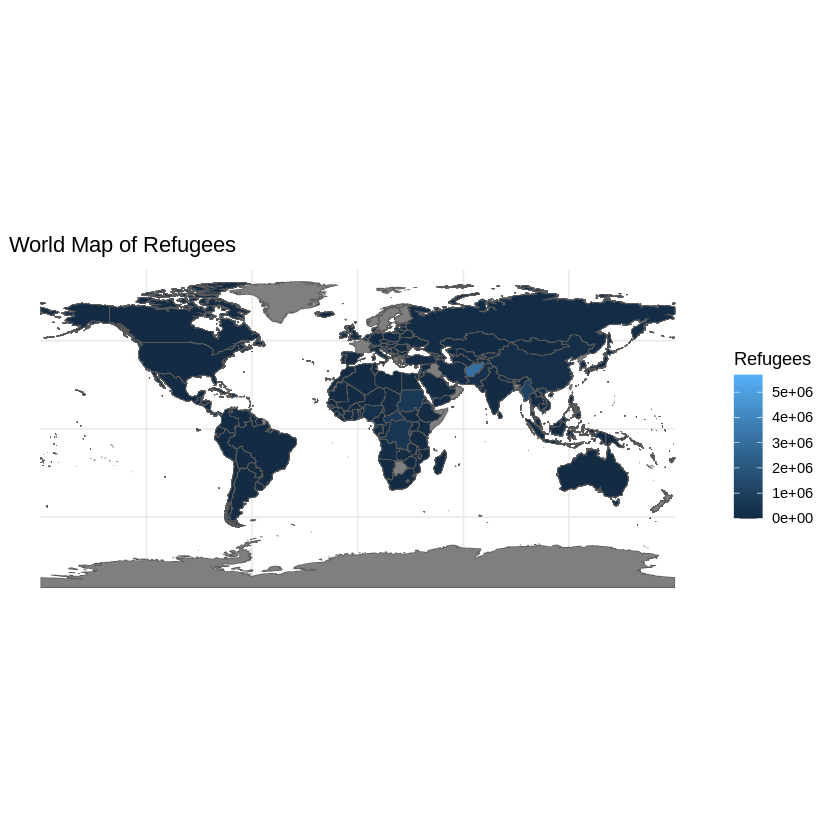

In [ ]:
# Merge the world map data with the dataframe
merged_map_data <- merge(world_map, df, by.x = "iso_a3", by.y = "iso3c", all.x = TRUE)

# Create a world map visualizing GDP per capita
ggplot(data = merged_map_data) +
  geom_sf(aes(fill = Refugees)) +
  labs(title = "World Map of Refugees",
       fill = "Refugees") +
  theme_minimal()

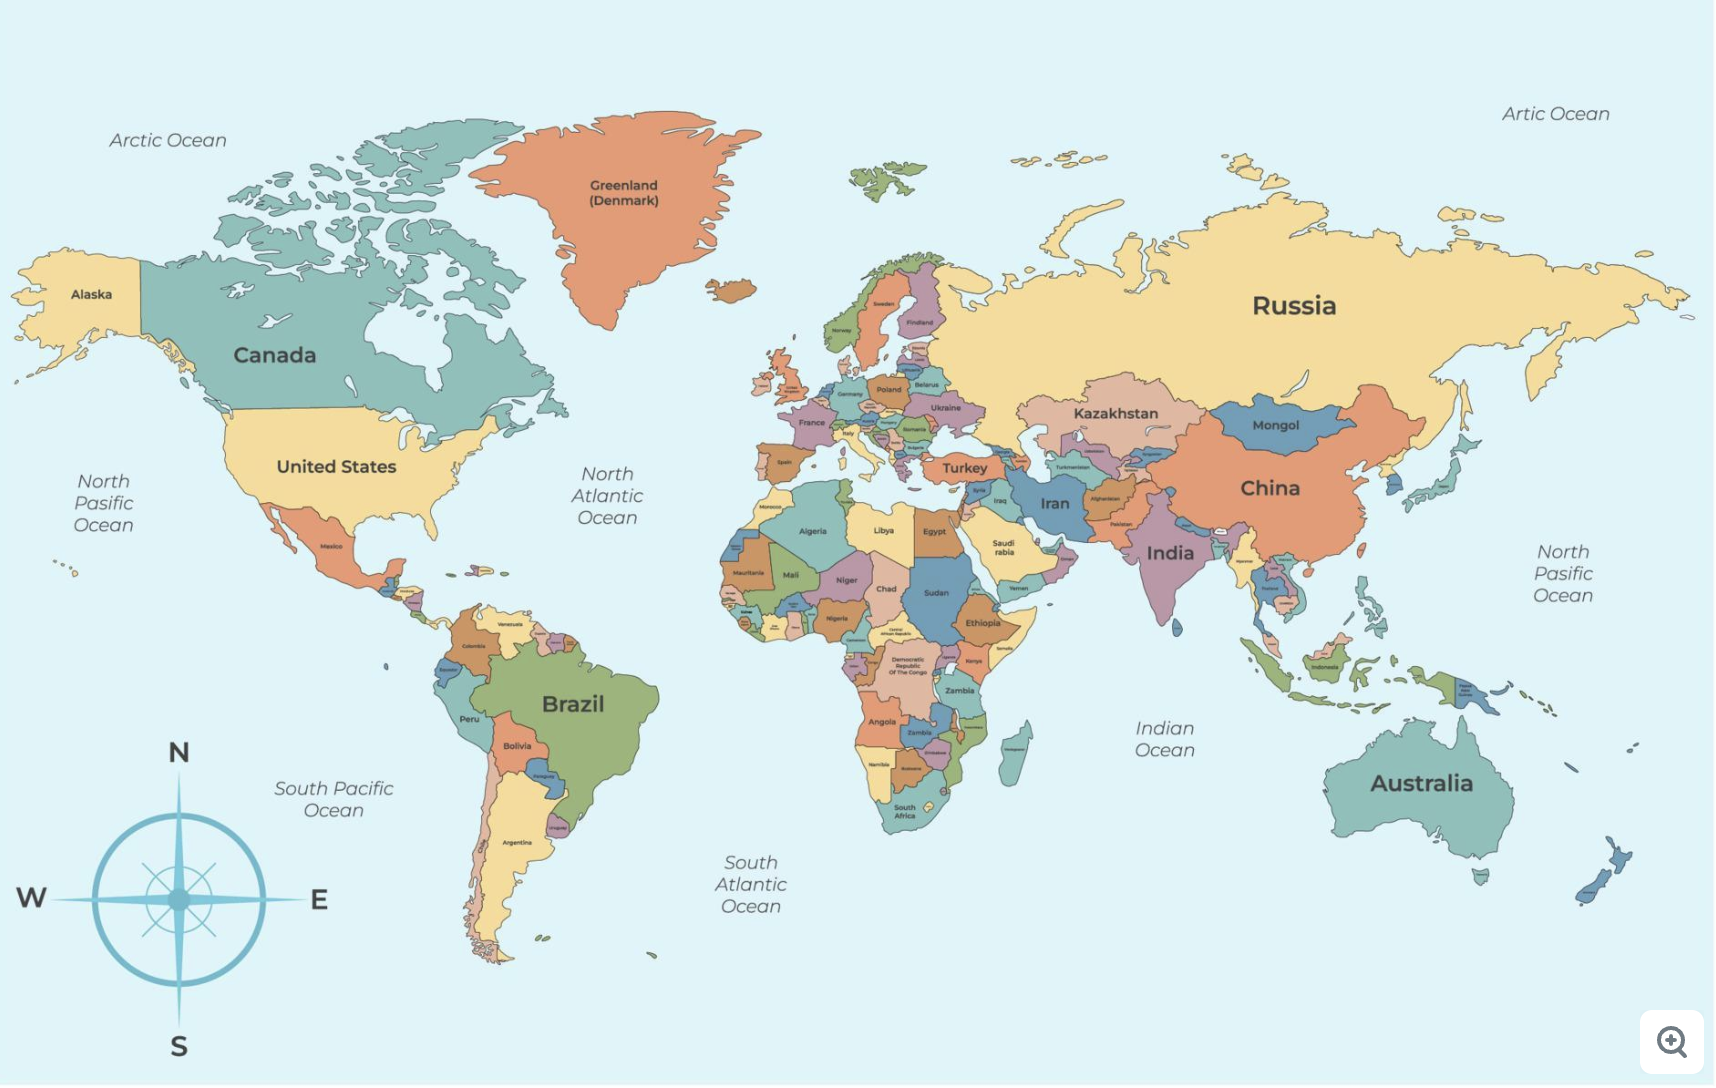

- Afghanistan
- Iran
- Country in the Middle East

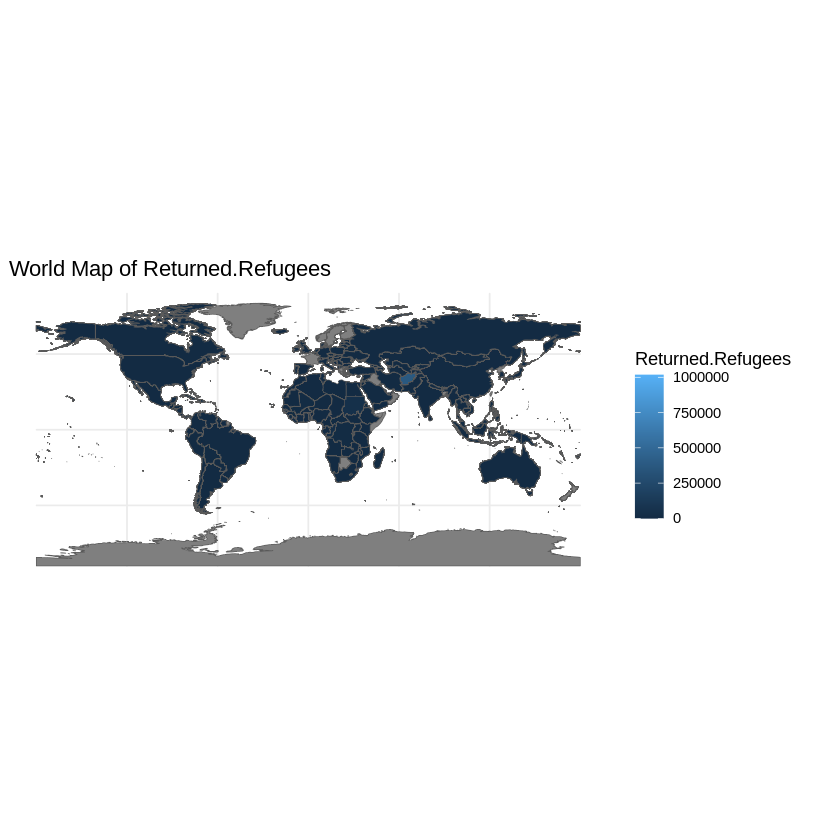

In [ ]:
# Merge the world map data with the dataframe
merged_map_data <- merge(world_map, df, by.x = "iso_a3", by.y = "iso3c", all.x = TRUE)

# Create a world map visualizing GDP per capita
ggplot(data = merged_map_data) +
  geom_sf(aes(fill = Returned.Refugees)) +
  labs(title = "World Map of Returned.Refugees",
       fill = "Returned.Refugees") +
  theme_minimal()

## Adding titles, labels, and annotations

Add informative titles, axis labels, and annotations to plots.


Create a scatter plot with added title and axis labels as instructed.



Warning message:
“Removed 26 rows containing missing values or values outside the scale range
(`geom_point()`).”


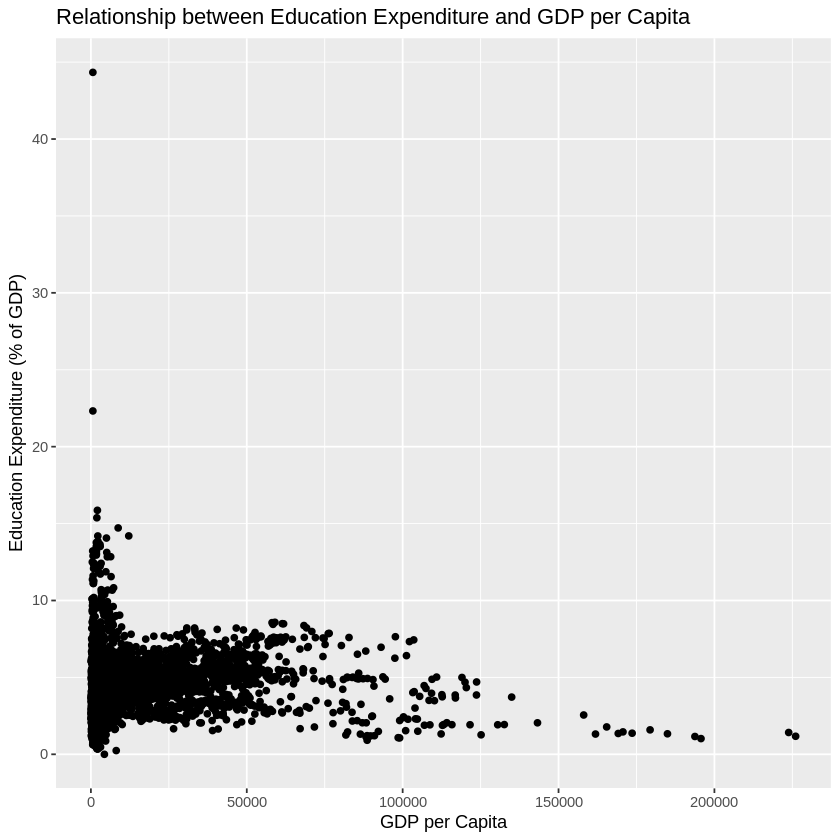

In [ ]:
# Create a scatter plot of gdp_per_capita vs edu_exp_gdp
scatter_plot <- ggplot(df, aes(x = gdp_per_capita, y = edu_exp_gdp)) +
  geom_point() + # Add points layer
  labs(title = "Relationship between Education Expenditure and GDP per Capita", # Add title
       x = "GDP per Capita", # Add x-axis label
       y = "Education Expenditure (% of GDP)") # Add y-axis label

# Display the plot
print(scatter_plot)

In [ ]:
head(df)

country     iso2c iso3c year lastupdated edu_exp_gdp gdp_per_capita
1 Afghanistan AF    AFG   2015 2025-07-01  3.25580     565.5697      
2 Afghanistan AF    AFG   2017 2025-07-01  4.34319     525.4698      
3 Afghanistan AF    AFG   2016 2025-07-01  4.54397     522.0822      
4 Afghanistan AF    AFG   2014 2025-07-01  3.69522     625.0549      
5 Afghanistan AF    AFG   2009 2025-07-01  4.81064     452.0537      
6 Afghanistan AF    AFG   2013 2025-07-01  3.45446     637.0871      
  gov_exp_gdp unemployment_rate inflation_rate ⋯ Country.of.Origin
1 NA           9.052            -0.6617092     ⋯ Afghanistan      
2 NA          11.184             4.9759515     ⋯ Afghanistan      
3 NA          10.133             4.3838920     ⋯ Afghanistan      
4 NA           7.915             4.6739960     ⋯ Afghanistan      
5 NA           7.754            -6.8111611     ⋯ Afghanistan      
6 NA           7.930             7.3857718     ⋯ Afghanistan      
  Country.of.Asylum.ISO Refugees Returned.Refugees Asylum.Seekers IDPs   
1 -                     2666294   61381            258862         1174306
2 -                     2624265   60541            333986         1837079
3 -                     2501447  383950            369072         1797551
4 -                     2596259   17815             85407          805409
5 -                     2887114   57577             30406          297129
6 -                     2556483   39665             75284          631286
  Returned.IDPs Stateless HST OOC   
1 123653        0         0   150369
2  32649        0         0   448040
3      0        0         0   114221
4      0        0         0   201361
5   7225        0         0     1479
6  21830        0         0   275817

In [ ]:
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Statistical summary of the dataframe
print("Statistical Summary:")
print(summary(df))

[1] "Statistical Summary:"
   country             iso2c              iso3c                year     
 Length:4087        Length:4087        Length:4087        Min.   :1990  
 Class :character   Class :character   Class :character   1st Qu.:2002  
 Mode  :character   Mode  :character   Mode  :character   Median :2010  
                                                          Mean   :2009  
                                                          3rd Qu.:2017  
                                                          Max.   :2023  
                                                                        
 lastupdated         edu_exp_gdp     gdp_per_capita       gov_exp_gdp     
 Length:4087        Min.   : 0.000   Min.   :    60.23   Min.   :  2.111  
 Class :character   1st Qu.: 3.095   1st Qu.:  1434.87   1st Qu.: 11.857  
 Mode  :character   Median : 4.212   Median :  4933.56   Median : 16.101  
                    Mean   : 4.396   Mean   : 14547.08   Mean   : 16.620  
              

In [ ]:
# Frequency count of a single column (e.g., income)
print("Frequency Count of Income Levels:")
print(table(df$income))

[1] "Frequency Count of Income Levels:"

        High income          Low income Lower middle income      Not classified 
               1654                 421                 993                   7 
Upper middle income 
               1012 


In [ ]:

# Correlation analysis between numerical columns
# Select numerical columns for correlation analysis
numerical_cols <- df[, c("edu_exp_gdp", "gdp_per_capita", "gov_exp_gdp", "unemployment_rate", "inflation_rate", "Refugees", "Returned.Refugees")]

# Calculate the correlation matrix
correlation_matrix <- cor(numerical_cols, use = "pairwise.complete.obs")

print("Correlation Matrix:")
print(correlation_matrix)

[1] "Correlation Matrix:"
                  edu_exp_gdp gdp_per_capita gov_exp_gdp unemployment_rate
edu_exp_gdp        1.00000000     0.04617639  0.59212213        0.14692202
gdp_per_capita     0.04617639     1.00000000  0.13999685       -0.13207473
gov_exp_gdp        0.59212213     0.13999685  1.00000000        0.15080141
unemployment_rate  0.14692202    -0.13207473  0.15080141        1.00000000
inflation_rate    -0.06437440    -0.16240548 -0.07590299        0.05334094
Refugees          -0.08466656    -0.10151606 -0.00199933       -0.02177061
Returned.Refugees -0.01525895    -0.04912387  0.05115742       -0.01852799
                  inflation_rate    Refugees Returned.Refugees
edu_exp_gdp          -0.06437440 -0.08466656       -0.01525895
gdp_per_capita       -0.16240548 -0.10151606       -0.04912387
gov_exp_gdp          -0.07590299 -0.00199933        0.05115742
unemployment_rate     0.05334094 -0.02177061       -0.01852799
inflation_rate        1.00000000  0.05594900        0.02184

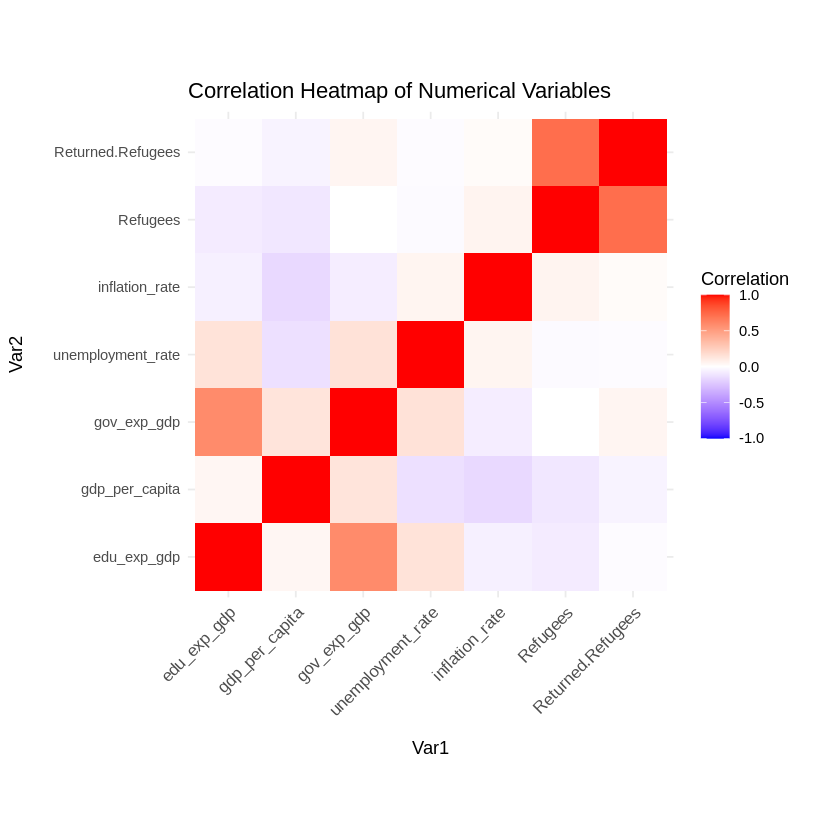

In [ ]:
# Visualize the correlation matrix using a heatmap
library(ggplot2)
library(reshape2)

# Melt the correlation matrix for plotting
melted_correlation_matrix <- melt(correlation_matrix)

# Create the heatmap
correlation_heatmap <- ggplot(melted_correlation_matrix, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                       midpoint = 0, limit = c(-1, 1), space = "Lab",
                       name = "Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1,
                                   size = 10, hjust = 1)) +
  coord_fixed() +
  labs(title = "Correlation Heatmap of Numerical Variables")

# Display the heatmap
print(correlation_heatmap)

## Probability distributions

Generate histograms and density plots to visualize the distributions of key continuous variables in the dataframe.


Warning message:
“Removed 26 rows containing non-finite outside the scale range (`stat_bin()`).”


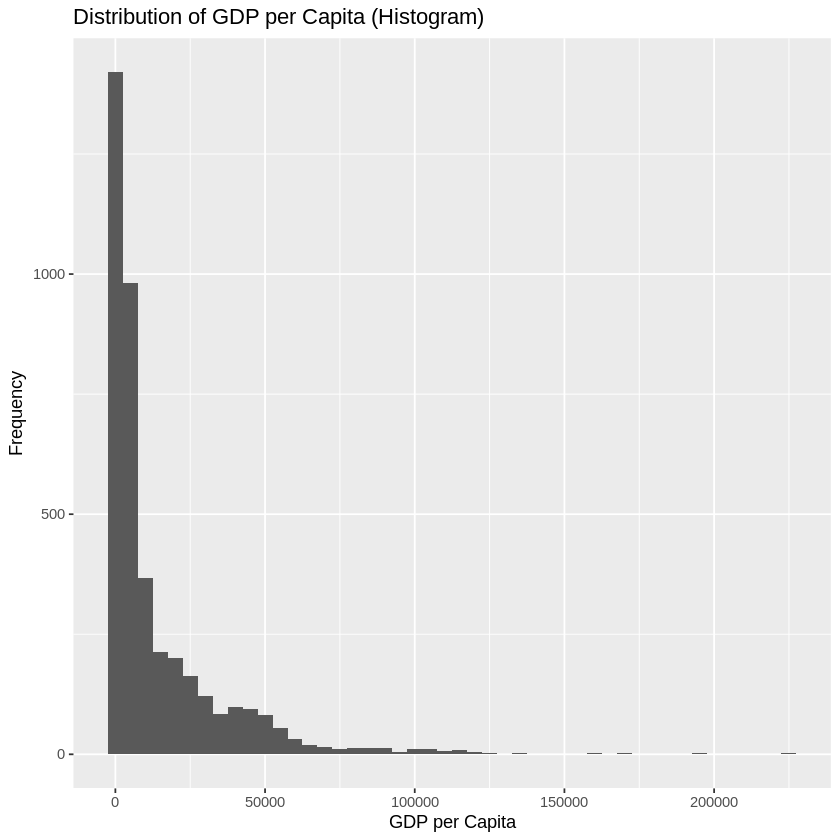

In [ ]:
# Create a histogram for gdp_per_capita
hist_gdp <- ggplot(df, aes(x = gdp_per_capita)) +
  geom_histogram(binwidth = 5000) + # Adjust binwidth as needed
  labs(title = "Distribution of GDP per Capita (Histogram)",
       x = "GDP per Capita",
       y = "Frequency")

print(hist_gdp)

Warning message:
“Removed 26 rows containing non-finite outside the scale range
(`stat_density()`).”


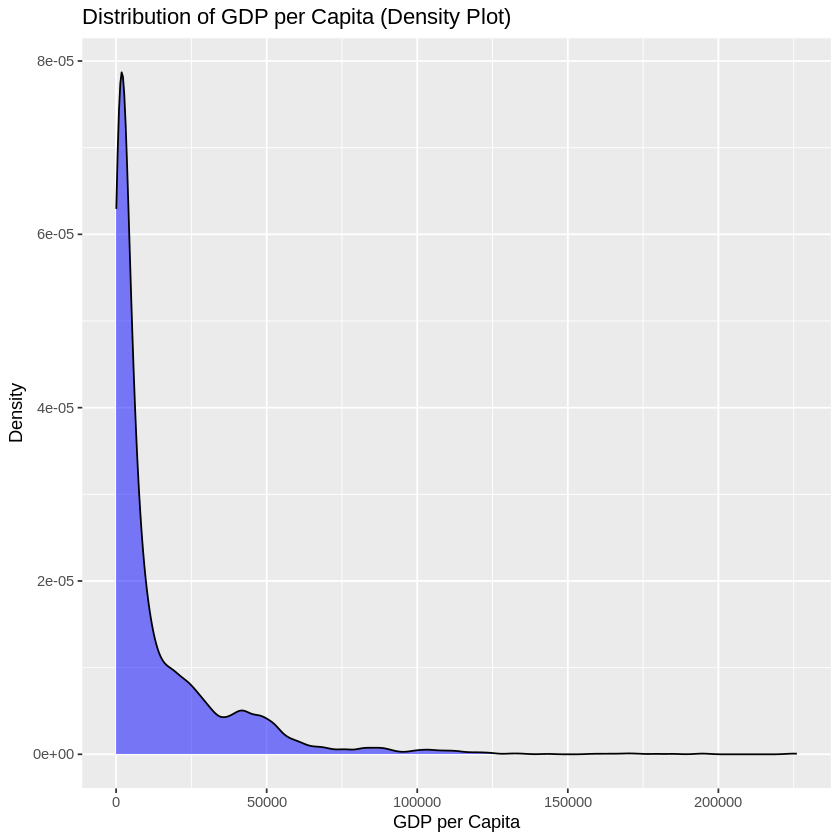

In [ ]:
# Create a density plot for gdp_per_capita
density_gdp <- ggplot(df, aes(x = gdp_per_capita)) +
  geom_density(fill = "blue", alpha = 0.5) + # Add fill and transparency
  labs(title = "Distribution of GDP per Capita (Density Plot)",
       x = "GDP per Capita",
       y = "Density")

# Display the plots
print(density_gdp)

Warning message:
“Removed 357 rows containing non-finite outside the scale range (`stat_bin()`).”


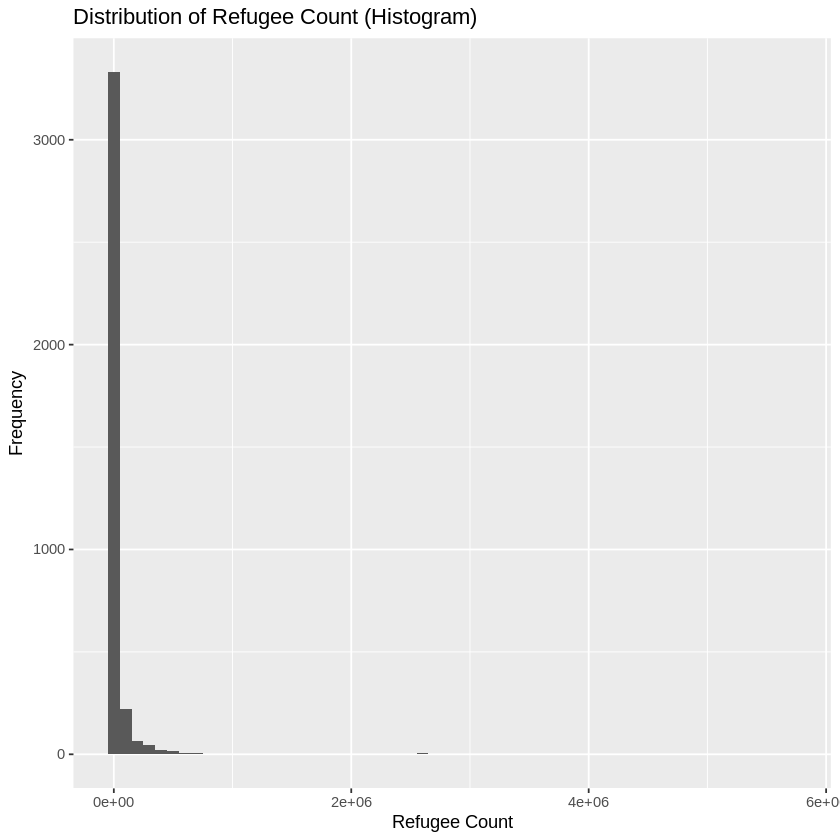

In [ ]:
# Create a histogram for Refugees
hist_refugees <- ggplot(df, aes(x = Refugees)) +
  geom_histogram(binwidth = 100000) + # Adjust binwidth as needed
  labs(title = "Distribution of Refugee Count (Histogram)",
       x = "Refugee Count",
       y = "Frequency")

# Display the plots
print(hist_refugees)

Warning message:
“Removed 357 rows containing non-finite outside the scale range
(`stat_density()`).”


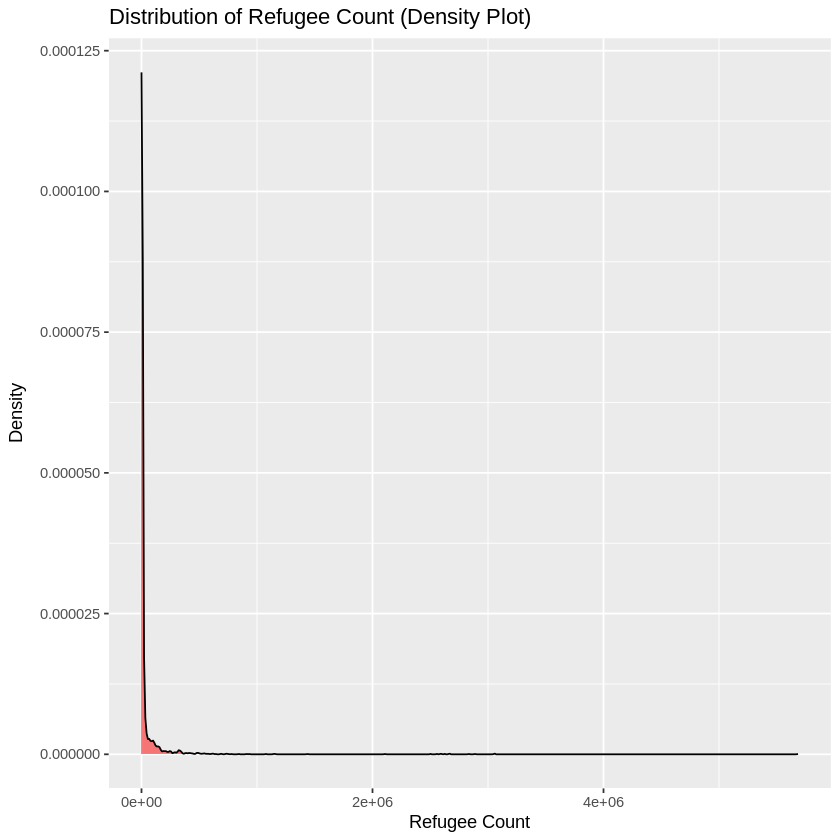

In [ ]:
# Create a density plot for Refugees
density_refugees <- ggplot(df, aes(x = Refugees)) +
  geom_density(fill = "red", alpha = 0.5) + # Add fill and transparency
  labs(title = "Distribution of Refugee Count (Density Plot)",
       x = "Refugee Count",
       y = "Density")

print(density_refugees)

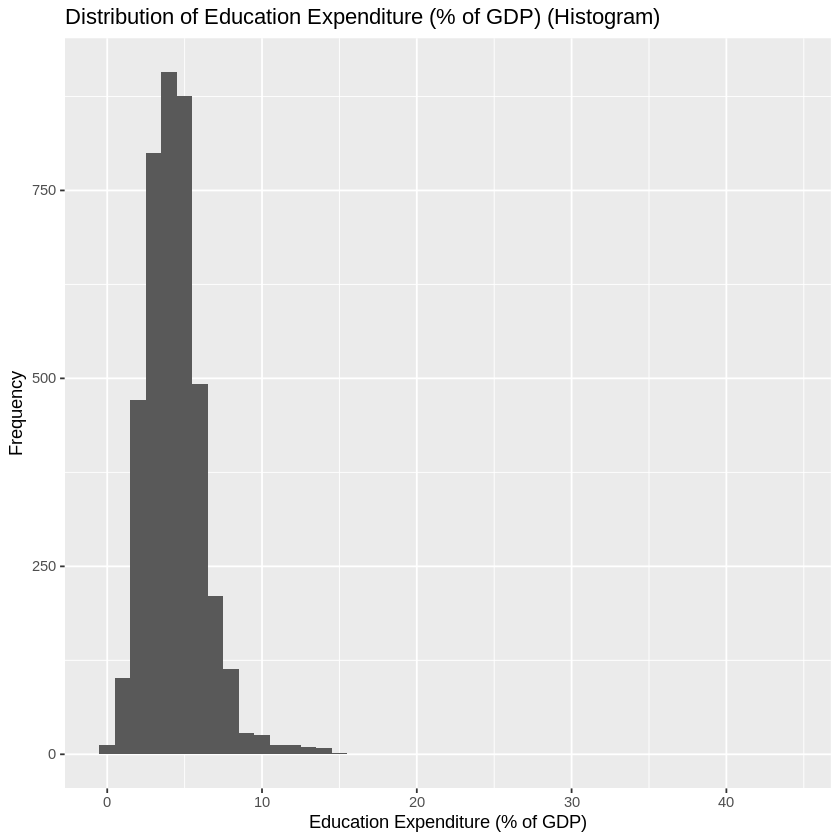

In [ ]:
# Create a histogram for edu_exp_gdp
hist_edu <- ggplot(df, aes(x = edu_exp_gdp)) +
  geom_histogram(binwidth = 1) + # Adjust binwidth as needed
  labs(title = "Distribution of Education Expenditure (% of GDP) (Histogram)",
       x = "Education Expenditure (% of GDP)",
       y = "Frequency")

# Display the plots
print(hist_edu)

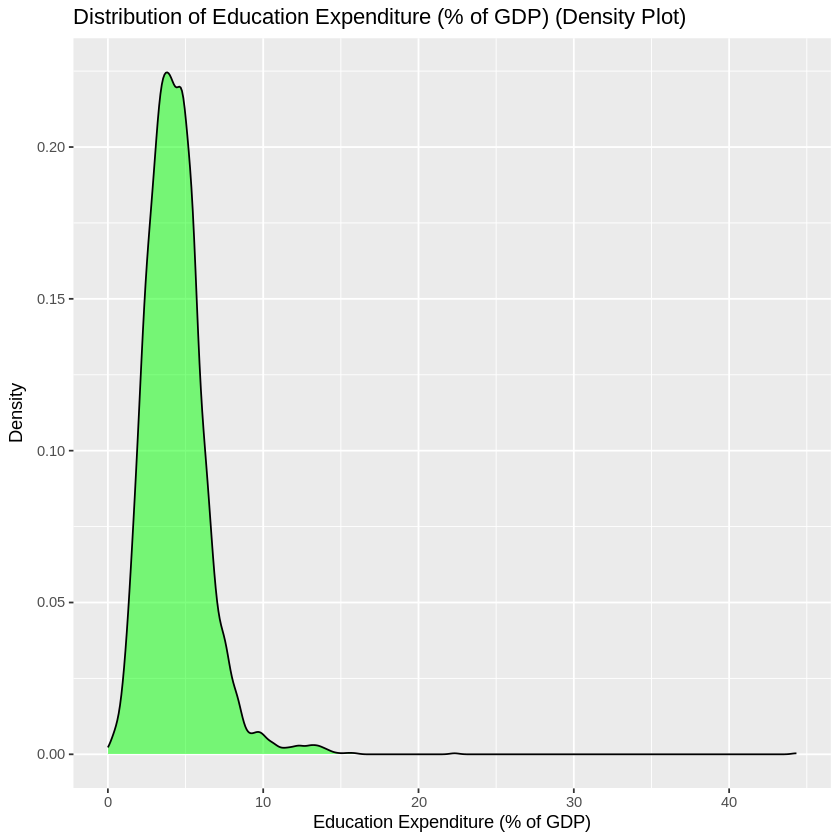

In [ ]:
# Create a density plot for edu_exp_gdp
density_edu <- ggplot(df, aes(x = edu_exp_gdp)) +
  geom_density(fill = "green", alpha = 0.5) + # Add fill and transparency
  labs(title = "Distribution of Education Expenditure (% of GDP) (Density Plot)",
       x = "Education Expenditure (% of GDP)",
       y = "Density")

print(density_edu)

## Summary statistics

Generate summary statistics for the numerical columns.


In [ ]:
# Select numerical columns
numerical_cols <- df[, c("edu_exp_gdp", "gdp_per_capita", "gov_exp_gdp", "unemployment_rate", "inflation_rate", "population", "urban_pop_percent", "education_index", "hdi_proxy", "Refugees", "Returned.Refugees")]

# Calculate and print the statistical summary
print(summary(numerical_cols))

  edu_exp_gdp     gdp_per_capita       gov_exp_gdp      unemployment_rate
 Min.   : 0.000   Min.   :    60.23   Min.   :  2.111   Min.   : 0.100   
 1st Qu.: 3.095   1st Qu.:  1434.87   1st Qu.: 11.857   1st Qu.: 3.760   
 Median : 4.212   Median :  4933.56   Median : 16.101   Median : 6.075   
 Mean   : 4.396   Mean   : 14547.08   Mean   : 16.620   Mean   : 7.702   
 3rd Qu.: 5.401   3rd Qu.: 18860.38   3rd Qu.: 19.713   3rd Qu.:10.319   
 Max.   :44.334   Max.   :226052.00   Max.   :115.924   Max.   :38.800   
                  NA's   :26          NA's   :554       NA's   :333      
 inflation_rate      population        urban_pop_percent education_index  
 Min.   :-10.630   Min.   :8.798e+03   Min.   :  6.271   Min.   :  4.721  
 1st Qu.:  1.630   1st Qu.:2.099e+06   1st Qu.: 39.384   1st Qu.: 67.158  
 Median :  3.534   Median :7.982e+06   Median : 58.532   Median : 90.356  
 Mean   :  7.115   Mean   :3.883e+07   Mean   : 58.208   Mean   : 83.311  
 3rd Qu.:  7.189   3rd Qu.:2.496e

## Paired two-sample t-test

Paired two-sample t-test


In [ ]:
library(dplyr)

# Filter df for years 2010 and 2011
df_2010_2011_processed <- df %>%
  filter(year %in% c(2010, 2011))

# Display the head of the new dataframe
head(df_2010_2011_processed)

country     iso2c iso3c year lastupdated edu_exp_gdp gdp_per_capita
1 Afghanistan AF    AFG   2010 2025-07-01  3.479450      560.6215    
2 Afghanistan AF    AFG   2011 2025-07-01  3.462010      606.6947    
3 Albania     AL    ALB   2010 2025-07-01  3.413075     4149.1447    
4 Albania     AL    ALB   2011 2025-07-01  3.240008     4465.7091    
5 Andorra     AD    AND   2010 2025-07-01  2.976630    42746.8310    
6 Andorra     AD    AND   2011 2025-07-01  2.987060    46657.1561    
  gov_exp_gdp unemployment_rate inflation_rate ⋯ Country.of.Origin
1       NA     7.753             2.178538      ⋯ Afghanistan      
2       NA     7.784            11.804186      ⋯ Afghanistan      
3 11.68943    14.086             3.626047      ⋯ Albania          
4 11.87303    13.481             3.429123      ⋯ Albania          
5       NA        NA                   NA      ⋯ Andorra          
6       NA        NA                   NA      ⋯ Andorra          
  Country.of.Asylum.ISO Refugees Returned.Refugees Asylum.Seekers IDPs  
1 -                     3054699  118031            37101          351907
2 -                     2664423   71145            39199          447547
3 -                       14771       0             1350               0
4 -                       13552       0             2193               0
5 -                           5       0                0               0
6 -                           5       0                0               0
  Returned.IDPs Stateless HST OOC   
1  3366         0         0   839323
2 75453         0         0   952531
3     0         0         0       36
4     0         0         0      613
5     0         0         0        0
6     0         0         0        0

In [ ]:
library(dplyr)
library(tidyr)

# Filter data for 2010 and 2011, summarize GDP per capita for duplicates, filter for common countries, pivot, and remove NAs
df_2010_2011_processed <- df %>%
  filter(year %in% c(2010, 2011)) %>%
  group_by(country, year) %>%
  summarise(gdp_per_capita = mean(gdp_per_capita, na.rm = TRUE)) %>% # Summarize duplicates by taking the mean
  ungroup() %>%
  pivot_wider(names_from = year, values_from = gdp_per_capita) %>%
  na.omit() # Remove rows with any NA values after summarizing and pivoting

# Ensure the columns exist after na.omit in case all rows were removed
if ("2010" %in% names(df_2010_2011_processed) && "2011" %in% names(df_2010_2011_processed)) {
  # Perform paired t-test
  t_test_2010_2011 <- t.test(df_2010_2011_processed$'2010', df_2010_2011_processed$'2011', paired = TRUE)

  # Print the results
  print("Paired t-test results for GDP per Capita between 2010 and 2011:")
  print(t_test_2010_2011)
} else {
  print("Insufficient complete data for 2010 and 2011 to perform paired t-test.")
}


# Repeat for 2020 and 2021

# Filter data for 2020 and 2021, summarize GDP per capita for duplicates, filter for common countries, pivot, and remove NAs
df_2020_2021_processed <- df %>%
  filter(year %in% c(2020, 2021)) %>%
  group_by(country, year) %>%
  summarise(gdp_per_capita = mean(gdp_per_capita, na.rm = TRUE)) %>% # Summarize duplicates by taking the mean
  ungroup() %>%
  pivot_wider(names_from = year, values_from = gdp_per_capita) %>%
  na.omit() # Remove rows with any NA values after summarizing and pivoting

# Ensure the columns exist after na.omit
if ("2020" %in% names(df_2020_2021_processed) && "2021" %in% names(df_2020_2021_processed)) {
  # Perform paired t-test
  t_test_2020_2021 <- t.test(df_2020_2021_processed$'2020', df_2020_2021_processed$'2021', paired = TRUE)

  # Print the results
  print("Paired t-test results for GDP per Capita between 2020 and 2021:")
  print(t_test_2020_2021)
} else {
    print("Insufficient complete data for 2020 and 2021 to perform paired t-test.")
}

`summarise()` has grouped output by 'country'. You can override using the
`.groups` argument.


[1] "Paired t-test results for GDP per Capita between 2010 and 2011:"

	Paired t-test

data:  df_2010_2011_processed$"2010" and df_2010_2011_processed$"2011"
t = -6.0762, df = 137, p-value = 1.148e-08
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -2528.467 -1286.816
sample estimates:
mean difference 
      -1907.642 



`summarise()` has grouped output by 'country'. You can override using the
`.groups` argument.


[1] "Paired t-test results for GDP per Capita between 2020 and 2021:"

	Paired t-test

data:  df_2020_2021_processed$"2020" and df_2020_2021_processed$"2021"
t = -7.8978, df = 155, p-value = 4.871e-13
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -3038.159 -1822.428
sample estimates:
mean difference 
      -2430.293 



In [ ]:
# Inspect the processed dataframes
print("Processed data for 2010 and 2011:")
print(head(df_2010_2011_processed))
print(summary(df_2010_2011_processed))

print("\nProcessed data for 2020 and 2021:")
print(head(df_2020_2021_processed))
print(summary(df_2020_2021_processed))

[1] "Processed data for 2010 and 2011:"
# A tibble: 6 × 3
  country     `2010` `2011`
  <chr>        <dbl>  <dbl>
1 Afghanistan   561.   607.
2 Albania      4149.  4466.
3 Andorra     42747. 46657.
4 Angola       3597.  4616.
5 Argentina   10260. 12704.
6 Armenia      3041.  3350.
   country               2010               2011         
 Length:138         Min.   :   216.7   Min.   :   230.1  
 Class :character   1st Qu.:  1512.1   1st Qu.:  1603.7  
 Mode  :character   Median :  6162.9   Median :  7136.1  
                    Mean   : 17433.0   Mean   : 19340.7  
                    3rd Qu.: 23902.3   3rd Qu.: 25386.8  
                    Max.   :161853.9   Max.   :179364.0  
[1] "\nProcessed data for 2020 and 2021:"
# A tibble: 6 × 3
  country             `2020` `2021`
  <chr>                <dbl>  <dbl>
1 Albania              5371.  6413.
2 Algeria              3744.  4161.
3 Andorra             37361. 42426.
4 Angola               1450.  1926.
5 Antigua and Barbuda 15370. 17349.


In [ ]:
library(dplyr)
library(tidyr)

# Filter data for 2010 and 2011 using the 'year' column, summarize GDP per capita, pivot, and remove NAs
df_2010_2011_processed_corrected <- df %>%
  filter(year %in% c(2010, 2011)) %>%
  group_by(country, year) %>%
  summarise(gdp_per_capita = mean(gdp_per_capita, na.rm = TRUE)) %>%
  ungroup() %>%
  pivot_wider(names_from = year, values_from = gdp_per_capita) %>%
  na.omit()

# Ensure the columns exist after na.omit
if ("2010" %in% names(df_2010_2011_processed_corrected) && "2011" %in% names(df_2010_2011_processed_corrected)) {
  # Perform paired t-test
  t_test_2010_2011_corrected <- t.test(df_2010_2011_processed_corrected$'2010', df_2010_2011_processed_corrected$'2011', paired = TRUE)

  # Print the results
  print("Paired t-test results for GDP per Capita between 2010 and 2011 (using 'year' column):")
  print(t_test_2010_2011_corrected)
} else {
  print("Insufficient complete data for 2010 and 2011 (using 'year' column) to perform paired t-test.")
}

# Repeat for 2020 and 2021 using the 'year' column

# Filter data for 2020 and 2021 using the 'year' column, summarize GDP per capita, pivot, and remove NAs
df_2020_2021_processed_corrected <- df %>%
  filter(year %in% c(2020, 2021)) %>%
  group_by(country, year) %>%
  summarise(gdp_per_capita = mean(gdp_per_capita, na.rm = TRUE)) %>%
  ungroup() %>%
  pivot_wider(names_from = year, values_from = gdp_per_capita) %>%
  na.omit()

# Ensure the columns exist after na.omit
if ("2020" %in% names(df_2020_2021_processed_corrected) && "2021" %in% names(df_2020_2021_processed_corrected)) {
  # Perform paired t-test
  t_test_2020_2021_corrected <- t.test(df_2020_2021_processed_corrected$'2020', df_2020_2021_processed_corrected$'2021', paired = TRUE)

  # Print the results
  print("Paired t-test results for GDP per Capita between 2020 and 2021 (using 'year' column):")
  print(t_test_2020_2021_corrected)
} else {
    print("Insufficient complete data for 2020 and 2021 (using 'year' column) to perform paired t-test.")
}

`summarise()` has grouped output by 'country'. You can override using the
`.groups` argument.


[1] "Paired t-test results for GDP per Capita between 2010 and 2011 (using 'year' column):"

	Paired t-test

data:  df_2010_2011_processed_corrected$"2010" and df_2010_2011_processed_corrected$"2011"
t = -6.0762, df = 137, p-value = 1.148e-08
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -2528.467 -1286.816
sample estimates:
mean difference 
      -1907.642 



`summarise()` has grouped output by 'country'. You can override using the
`.groups` argument.


[1] "Paired t-test results for GDP per Capita between 2020 and 2021 (using 'year' column):"

	Paired t-test

data:  df_2020_2021_processed_corrected$"2020" and df_2020_2021_processed_corrected$"2021"
t = -7.8978, df = 155, p-value = 4.871e-13
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -3038.159 -1822.428
sample estimates:
mean difference 
      -2430.293 



In [ ]:
# Select numerical columns
numerical_cols <- df[, c("edu_exp_gdp", "gdp_per_capita", "gov_exp_gdp", "unemployment_rate", "inflation_rate", "population", "urban_pop_percent", "education_index", "hdi_proxy", "Refugees", "Returned.Refugees", "Year")]

# Calculate and print the statistical summary
print(summary(numerical_cols))

  edu_exp_gdp      gdp_per_capita       gov_exp_gdp     unemployment_rate
 Min.   : 0.2426   Min.   :    60.23   Min.   : 2.111   Min.   : 0.119   
 1st Qu.: 3.1429   1st Qu.:  1543.70   1st Qu.:13.112   1st Qu.: 4.106   
 Median : 4.3841   Median :  4729.67   Median :16.283   Median : 6.029   
 Mean   : 4.4873   Mean   : 11571.10   Mean   :16.904   Mean   : 7.875   
 3rd Qu.: 5.5140   3rd Qu.: 14532.50   3rd Qu.:19.871   3rd Qu.:10.162   
 Max.   :14.0591   Max.   :132604.44   Max.   :62.133   Max.   :35.359   
                                                                         
 inflation_rate      population        urban_pop_percent education_index  
 Min.   :-10.630   Min.   :2.080e+04   Min.   :  6.271   Min.   :  4.721  
 1st Qu.:  1.726   1st Qu.:2.074e+06   1st Qu.: 42.316   1st Qu.: 76.220  
 Median :  3.337   Median :8.430e+06   Median : 62.821   Median : 89.510  
 Mean   :  6.718   Mean   :4.982e+07   Mean   : 58.524   Mean   : 85.119  
 3rd Qu.:  5.681   3rd Qu.:1.805e

## Correlation and covariance

Calculate and display the correlation and covariance matrices for numerical variables.


In [ ]:
# Select numerical columns for correlation and covariance analysis
numerical_cols <- df[, c("edu_exp_gdp", "gdp_per_capita", "gov_exp_gdp", "unemployment_rate", "inflation_rate", "Refugees", "Returned.Refugees")]

# Calculate the correlation matrix
correlation_matrix <- cor(numerical_cols, use = "pairwise.complete.obs")
print("Correlation Matrix:")
print(correlation_matrix)

# Calculate the covariance matrix
covariance_matrix <- cov(numerical_cols, use = "pairwise.complete.obs")
print("Covariance Matrix:")
print(covariance_matrix)

[1] "Correlation Matrix:"
                  edu_exp_gdp gdp_per_capita gov_exp_gdp unemployment_rate
edu_exp_gdp        1.00000000     0.04617639  0.59212213        0.14692202
gdp_per_capita     0.04617639     1.00000000  0.13999685       -0.13207473
gov_exp_gdp        0.59212213     0.13999685  1.00000000        0.15080141
unemployment_rate  0.14692202    -0.13207473  0.15080141        1.00000000
inflation_rate    -0.06437440    -0.16240548 -0.07590299        0.05334094
Refugees          -0.08466656    -0.10151606 -0.00199933       -0.02177061
Returned.Refugees -0.01525895    -0.04912387  0.05115742       -0.01852799
                  inflation_rate    Refugees Returned.Refugees
edu_exp_gdp          -0.06437440 -0.08466656       -0.01525895
gdp_per_capita       -0.16240548 -0.10151606       -0.04912387
gov_exp_gdp          -0.07590299 -0.00199933        0.05115742
unemployment_rate     0.05334094 -0.02177061       -0.01852799
inflation_rate        1.00000000  0.05594900        0.02184

## Ggpairs plot

Generate a `ggpairs` plot to visualize relationships between a selection of continuous and categorical variables.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’, ‘S7’


Warning message:
“Removed 26 rows containing non-finite outside the scale range
(`stat_density()`).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 365 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 26 rows containing missing values”
Warning message:
“Removed 26 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 365 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 357 rows containing non-finite outside the scale range
(`stat_density()`).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 357 rows containing missing values”
Warning message:
“Removed 357 rows containing 

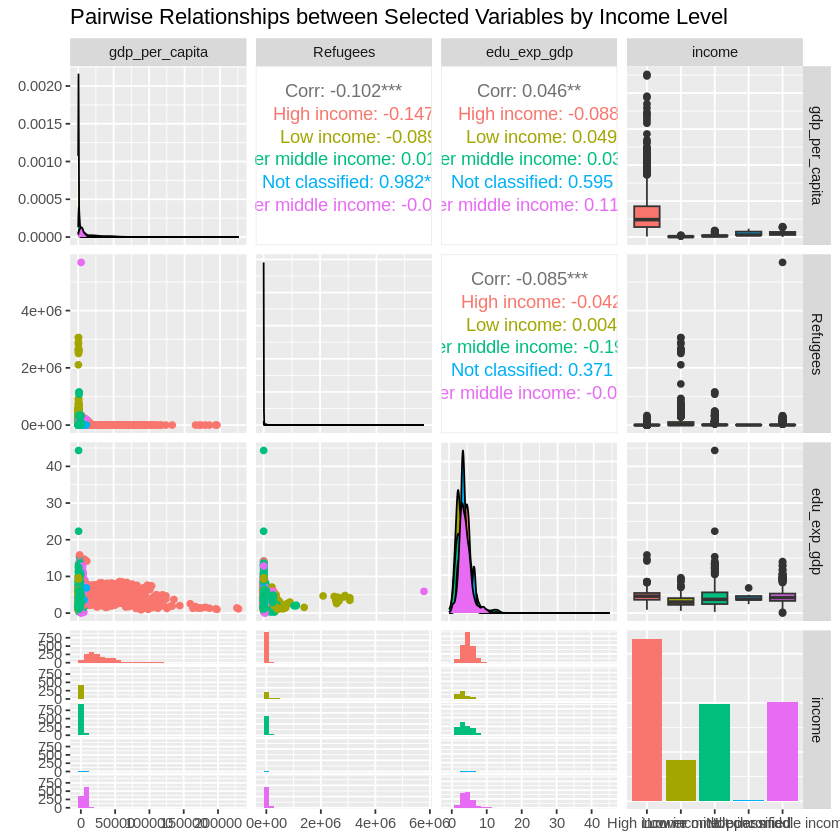

In [ ]:
install.packages("GGally")
library(GGally)

# Create the ggpairs plot
ggpairs_plot <- ggpairs(df, columns = c("gdp_per_capita", "Refugees", "edu_exp_gdp", "income"),
                        mapping = aes(color = income)) +
  ggtitle("Pairwise Relationships between Selected Variables by Income Level")

# Print the plot
print(ggpairs_plot)

## Summary:

### Data Analysis Key Findings

*   **Scatter Plots:** Scatter plots were successfully created to visualize the relationship between GDP per capita and education expenditure. The plots were enhanced by mapping additional variables like income level (color) and refugee numbers (size) to aesthetics.
*   **Bar Charts:** Bar charts were generated to show the count of countries by income level and the average GDP per capita per income level, effectively visualizing the distribution of a categorical variable and its relationship with a continuous variable.
*   **Line Plots:** Line plots were successfully created to display trends over time for GDP per capita and refugee counts, with lines colored by income level to compare trends across different income groups.
*   **Faceting:** Faceting was effectively used with `facet_wrap()` to create separate scatter plots of education expenditure vs. GDP per capita for each income level, allowing for detailed subgroup comparisons.
*   **Plot Customization:** Plots were successfully customized using `theme_minimal()` to apply a clean theme and the `theme()` function to modify specific elements like the plot title's size and boldness.
*   **Histograms and Density Plots:** Histograms and density plots were generated to visualize the distribution of the `gdp_per_capita` variable, both individually and combined, providing insights into the shape and spread of the data.
*   **Box Plots:** Box plots were created to compare the distribution of GDP per capita across different income levels, clearly illustrating the spread and central tendency of GDP within each category.
*   **Maps:** A world map was successfully created to visualize GDP per capita by country after merging world map data with the provided dataset.
*   **Titles, Labels, and Annotations:** Informative titles and axis labels were successfully added to the scatter plot using the `labs()` function.
*   **Saving and Exporting:** The process explained how to save plots in various formats using the `ggsave()` function, including specifying the filename, format, dimensions, and resolution.
*   The distribution analysis revealed varying patterns for `gdp_per_capita`, `Refugees`, and `edu_exp_gdp`, visualized through histograms and density plots.
*   Summary statistics for numerical columns indicated the range, central tendency, and presence of missing values in variables like `population`, `Refugees`, and `gdp_per_capita`.
*   Correlation and covariance matrices were calculated for a subset of numerical variables, providing insights into their linear relationships and how they co-vary.
*   A `ggpairs` plot was generated, visualizing pairwise relationships between `gdp_per_capita`, `Refugees`, `edu_exp_gdp`, and `income`, highlighting potential patterns across different income levels.
*   Paired two-sample t-tests showed statistically significant differences in mean `gdp_per_capita` between the years 2010 and 2011, and between 2020 and 2021.

